# EJERCICIO 1
## Fase 1: Exploración y Limpieza

In [114]:
pip install scipy


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [115]:

# Libería Pandas y Numpy
import pandas as pd
import numpy as np

# Librerías de visualización
import seaborn as sns
import matplotlib.pyplot as plt

# Relaciones de variables
from scipy.stats import shapiro, kstest

pd.set_option('display.max_columns', None) 
# para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
import warnings
warnings.filterwarnings("ignore")

### 1.1 Exploración Inicial:

#### - Exploración inicial de los datos para identificar posibles problemas, como valores nulos, atípicos o datos faltantes en las columnas relevantes.
#### - Utiliza funciones de Pandas para obtener información sobre la estructura de los datos, la presencia de valores nulos y estadísticas básicas de las columnas involucradas.
#### - Une los dos conjuntos de datos de la forma más eficiente.

##### A) CUSTOMER_ACTIVITY_FLIGHT

In [13]:
# Cargo el csv FLIGHT
df_activity_flight = pd.read_csv('files/Customer Flight Activity.csv', index_col = None)

# Con .head() se muestran las 5 primeras filas del dataframe FLIGHT
df_activity_flight.head()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0


In [14]:
# Con .tail() se muestran las 5 últimas filas del dataframe FLIGHT
df_activity_flight.tail()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
405619,999902,2018,12,0,0,0,0,0.0,0,0
405620,999911,2018,12,0,0,0,0,0.0,0,0
405621,999940,2018,12,3,0,3,1233,123.0,0,0
405622,999982,2018,12,0,0,0,0,0.0,0,0
405623,999986,2018,12,0,0,0,0,0.0,0,0


In [15]:
# # Con un .sample() se muestran 4 filas aleatorias del dataframe FLIGHT
df_activity_flight.sample(4)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
367338,758210,2018,10,0,0,0,0,0.0,0,0
185893,999272,2017,11,11,5,16,2848,284.0,0,0
159193,478247,2017,10,6,0,6,1668,166.0,0,0
191372,392781,2017,12,0,0,0,0,0.0,0,0


In [16]:
# Con .shape sabemos el número de filas y columnas
df_activity_flight.shape

(405624, 10)

In [17]:
# Para saber el nombre de las columnas del DF FLIGHT realizo .columns
df_activity_flight.columns

Index(['Loyalty Number', 'Year', 'Month', 'Flights Booked',
       'Flights with Companions', 'Total Flights', 'Distance',
       'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed'],
      dtype='object')

In [18]:
# Función para saber si hay valores duplicados
df_activity_flight.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
405619    False
405620    False
405621    False
405622    False
405623    False
Length: 405624, dtype: bool

In [19]:
# Número total de filas duplicadas
num_duplicated = df_activity_flight.duplicated().sum()

# Número total de filas en el DataFrame
total_rows = len(df_activity_flight)

# Calcular el porcentaje de filas duplicadas
percent_duplicated = (num_duplicated / total_rows) * 100

# Imprimir el resultado
print(f'Porcentaje de filas duplicadas: {percent_duplicated:.2f}%')


Porcentaje de filas duplicadas: 0.46%


In [20]:
# Calculo la cantidad de filas duplicadas en el Data Frame 
df_activity_flight.duplicated().sum()

1864

In [21]:
# frecuencia de valores únicos en la columna year
df_activity_flight['Year'].value_counts()

Year
2017    202812
2018    202812
Name: count, dtype: int64

In [22]:
# selecciono las columnas por tipo de datos
df_activity_flight.select_dtypes(include=['int'])

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,0,0
1,100102,2017,1,10,4,14,2030,0,0
2,100140,2017,1,6,0,6,1200,0,0
3,100214,2017,1,0,0,0,0,0,0
4,100272,2017,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
405619,999902,2018,12,0,0,0,0,0,0
405620,999911,2018,12,0,0,0,0,0,0
405621,999940,2018,12,3,0,3,1233,0,0
405622,999982,2018,12,0,0,0,0,0,0


In [23]:
# Muestro informacion del data frame:

df_activity_flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 30.9 MB


In [24]:
# Calculo la cantidad de valores nulos en cada columna
df_activity_flight.isnull().sum()

Loyalty Number                 0
Year                           0
Month                          0
Flights Booked                 0
Flights with Companions        0
Total Flights                  0
Distance                       0
Points Accumulated             0
Points Redeemed                0
Dollar Cost Points Redeemed    0
dtype: int64

In [25]:
# Calculo la cantidad de valores no nulos en cada columna
df_activity_flight.notnull().sum()

Loyalty Number                 405624
Year                           405624
Month                          405624
Flights Booked                 405624
Flights with Companions        405624
Total Flights                  405624
Distance                       405624
Points Accumulated             405624
Points Redeemed                405624
Dollar Cost Points Redeemed    405624
dtype: int64

In [26]:
#  Realizo la estadística descriptiva y mediante .T le cambio la presentación
df_activity_flight.describe().T

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,405624.0,550037.873084,258935.286969,100018.0,326961.00,550834.0,772194.00,999986.0
Year,405624.0,2017.500000,0.500001,2017.0,2017.00,2017.5,2018.00,2018.0
Month,405624.0,6.500000,3.452057,1.0,3.75,6.5,9.25,12.0
Flights Booked,405624.0,4.115052,5.225518,0.0,0.00,1.0,8.00,21.0
Flights with Companions,405624.0,1.031805,2.076869,0.0,0.00,0.0,1.00,11.0
Total Flights,405624.0,5.146858,6.521227,0.0,0.00,1.0,10.00,32.0
Distance,405624.0,1208.880059,1433.155320,0.0,0.00,488.0,2336.00,6293.0
Points Accumulated,405624.0,123.692721,146.599831,0.0,0.00,50.0,239.00,676.5
Points Redeemed,405624.0,30.696872,125.486049,0.0,0.00,0.0,0.00,876.0
Dollar Cost Points Redeemed,405624.0,2.484503,10.150038,0.0,0.00,0.0,0.00,71.0


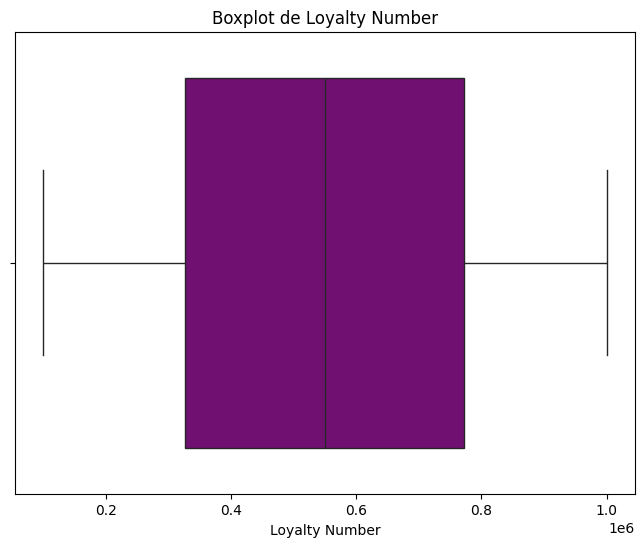

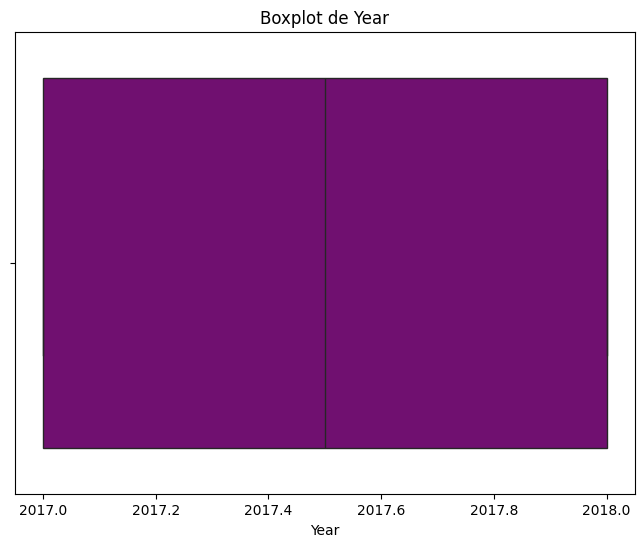

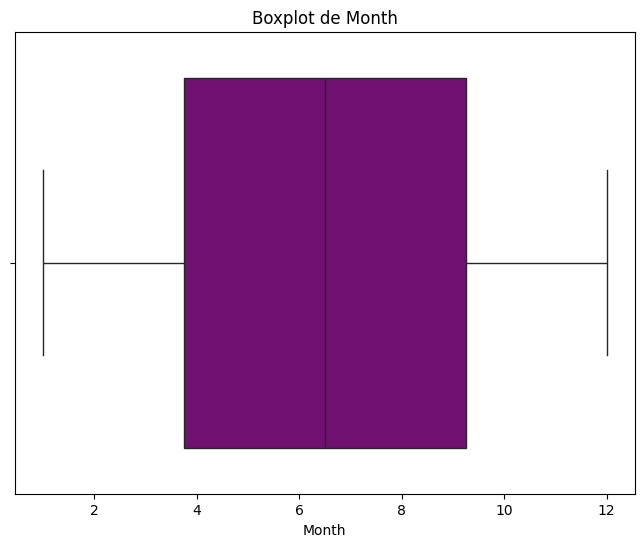

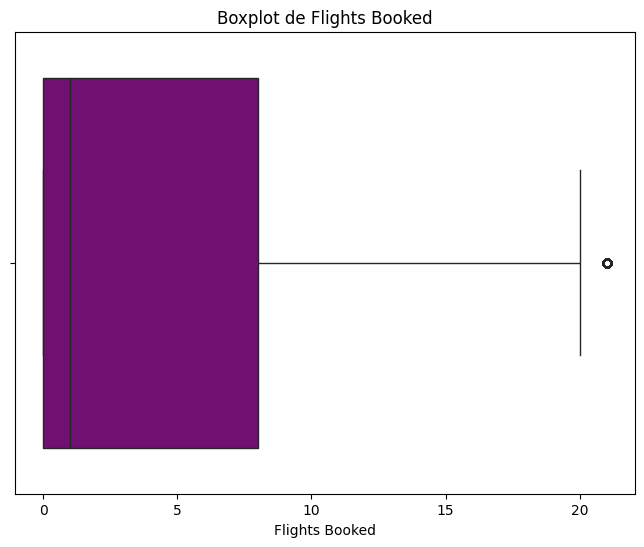

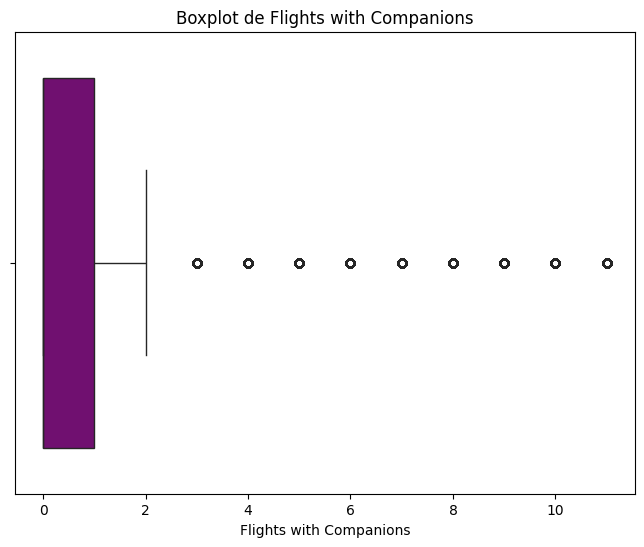

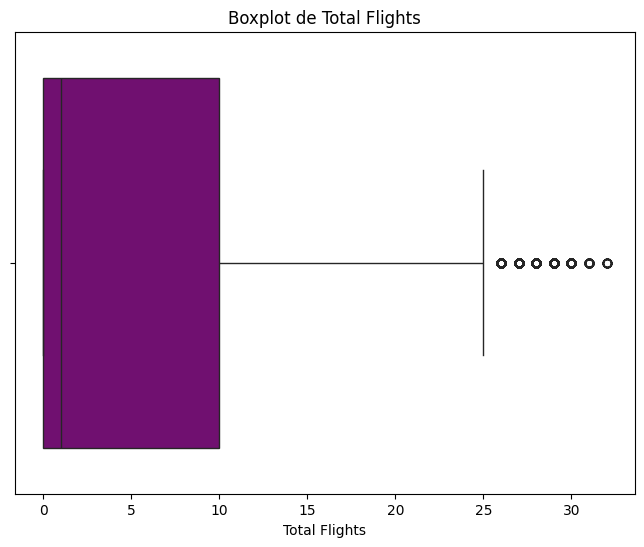

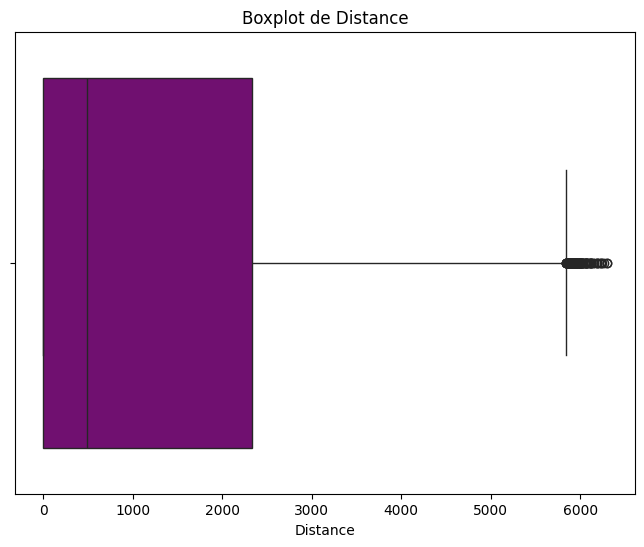

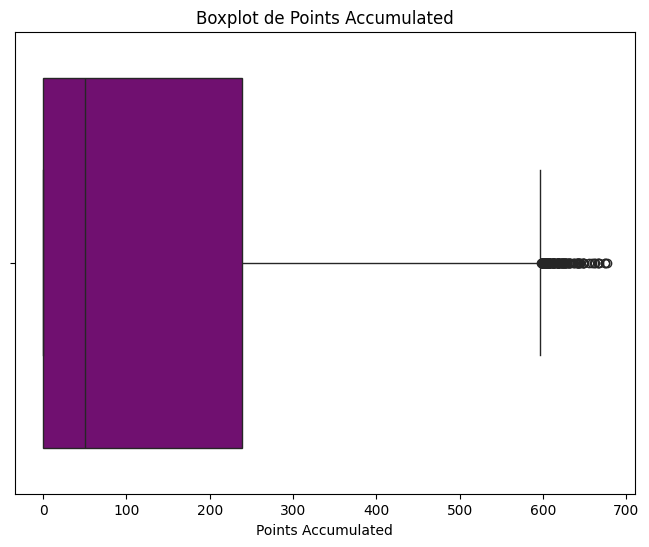

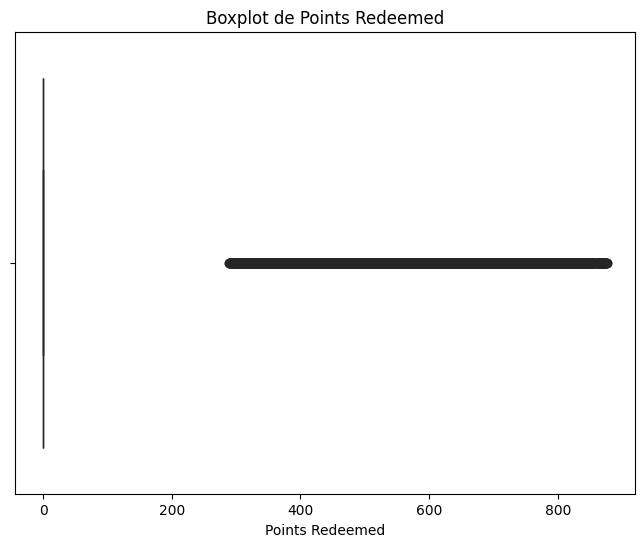

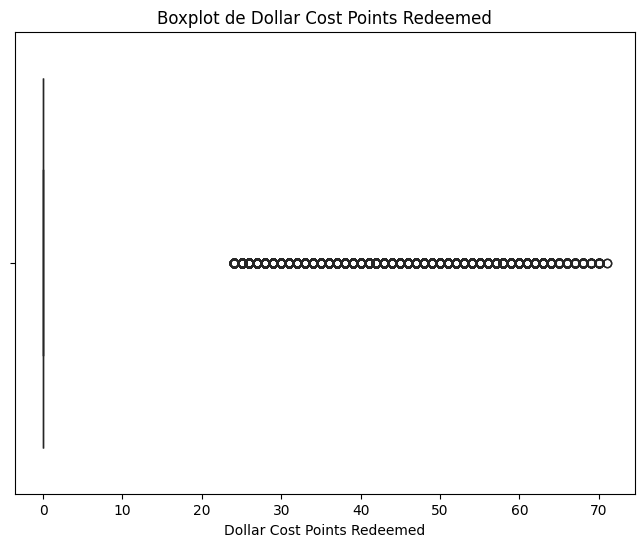

In [27]:
# se ve la distribución en gráficas FLIGHT

for column in df_activity_flight.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df_activity_flight[column], color='purple')
    plt.title(f'Boxplot de {column}')
    plt.xlabel(column)
    plt.show()


##### B) CUSTOMER_LOYALTY_HISTORY

In [28]:
## Cargo el csv LOYALTY y veo las 5 primeras filas
df_activity_loyalty = pd.read_csv('files/Customer Loyalty History.csv', index_col = None)
df_activity_loyalty.head()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


In [29]:
# Veo las últimas 5 filas
df_activity_loyalty.tail()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
16732,823768,Canada,British Columbia,Vancouver,V6E 3Z3,Female,College,NaN,Married,Star,61850.19,Standard,2012,12,NaN,NaN
16733,680886,Canada,Saskatchewan,Regina,S1J 3C5,Female,Bachelor,89210.0,Married,Star,67907.27,Standard,2014,9,NaN,NaN
16734,776187,Canada,British Columbia,Vancouver,V5R 1W3,Male,College,NaN,Single,Star,74228.52,Standard,2014,3,NaN,NaN
16735,906428,Canada,Yukon,Whitehorse,Y2K 6R0,Male,Bachelor,-57297.0,Married,Star,10018.66,2018 Promotion,2018,4,NaN,NaN
16736,652627,Canada,Manitoba,Winnipeg,R2C 0M5,Female,Bachelor,75049.0,Married,Star,83325.38,Standard,2015,12,2016.0,8.0


In [30]:
# Miro 6 filas aleatorias 
df_activity_loyalty.sample(6)

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
13983,861415,Canada,Ontario,Kingston,M9K 2P4,Female,Bachelor,68728.0,Married,Star,5846.52,Standard,2014,2,NaN,NaN
14280,829861,Canada,British Columbia,Vancouver,V1E 4R6,Female,College,NaN,Divorced,Star,6630.84,Standard,2014,8,NaN,NaN
16295,819267,Canada,Alberta,Calgary,T3E 2V9,Male,High School or Below,63837.0,Divorced,Star,17930.60,Standard,2015,12,NaN,NaN
12510,927721,Canada,Saskatchewan,Regina,S1J 3C5,Male,Bachelor,60313.0,Married,Star,3942.92,Standard,2018,5,NaN,NaN
8917,937922,Canada,British Columbia,Vancouver,V5R 1W3,Female,Bachelor,55479.0,Married,Nova,11793.13,Standard,2016,4,NaN,NaN
12209,393565,Canada,Ontario,Toronto,M8Y 4K8,Male,Bachelor,56232.0,Married,Star,3344.81,Standard,2013,4,NaN,NaN


In [31]:
# Nº de filas y columnas
df_activity_loyalty.shape

(16737, 16)

In [32]:
# Nombres de las columnas 
df_activity_loyalty.columns

Index(['Loyalty Number', 'Country', 'Province', 'City', 'Postal Code',
       'Gender', 'Education', 'Salary', 'Marital Status', 'Loyalty Card',
       'CLV', 'Enrollment Type', 'Enrollment Year', 'Enrollment Month',
       'Cancellation Year', 'Cancellation Month'],
      dtype='object')

In [33]:
# Valores duplicados
df_activity_loyalty.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
16732    False
16733    False
16734    False
16735    False
16736    False
Length: 16737, dtype: bool

In [34]:
# Número total de filas duplicadas
num_duplicated_loyalty = df_activity_loyalty.duplicated().sum()

# Número total de filas en el DataFrame
total_rows_loyalty = len(df_activity_loyalty)

# Cálculo del porcentaje de filas duplicadas
percent_duplicated_loyalty = (num_duplicated_loyalty / total_rows_loyalty) * 100

print(f'Porcentaje de filas duplicadas: {percent_duplicated_loyalty:.2f}%')

Porcentaje de filas duplicadas: 0.00%


In [35]:
# Frecuencia de valores únicos en la columna year
df_activity_loyalty['Education'].value_counts()

Education
Bachelor                10475
College                  4238
High School or Below      782
Doctor                    734
Master                    508
Name: count, dtype: int64

In [36]:
# Selección de columnas por tipo de datos
df_activity_loyalty.select_dtypes(include=['int'])

,Loyalty Number,Enrollment Year,Enrollment Month
0,480934,2016,2
1,549612,2016,3
2,429460,2014,7
3,608370,2013,2
4,530508,2014,10
...,...,...,...
16732,823768,2012,12
16733,680886,2014,9
16734,776187,2014,3
16735,906428,2018,4


In [37]:
# Muestro información del data frame:

df_activity_loyalty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    16737 non-null  int64  
 14  Cancellation Year   2067 non-null   float64
 15  Cancellation Month  2067 non-null   float64
dtypes: f

In [38]:
# Calculo la cantidad de valores nulos en cada columna
df_activity_loyalty.isnull().sum()

Loyalty Number            0
Country                   0
Province                  0
City                      0
Postal Code               0
Gender                    0
Education                 0
Salary                 4238
Marital Status            0
Loyalty Card              0
CLV                       0
Enrollment Type           0
Enrollment Year           0
Enrollment Month          0
Cancellation Year     14670
Cancellation Month    14670
dtype: int64

In [39]:
# Calculo el porcentaje de valores nulos en cada columna
percent_nulls_loyalty = df_activity_loyalty.isnull().sum() / len(df_activity_loyalty) * 100

print(percent_nulls_loyalty)


Loyalty Number         0.000000
Country                0.000000
Province               0.000000
City                   0.000000
Postal Code            0.000000
Gender                 0.000000
Education              0.000000
Salary                25.321145
Marital Status         0.000000
Loyalty Card           0.000000
CLV                    0.000000
Enrollment Type        0.000000
Enrollment Year        0.000000
Enrollment Month       0.000000
Cancellation Year     87.650117
Cancellation Month    87.650117
dtype: float64


In [40]:
# Calculo la cantidad de valores no nulos en cada columna
df_activity_loyalty.notnull().sum()

Loyalty Number        16737
Country               16737
Province              16737
City                  16737
Postal Code           16737
Gender                16737
Education             16737
Salary                12499
Marital Status        16737
Loyalty Card          16737
CLV                   16737
Enrollment Type       16737
Enrollment Year       16737
Enrollment Month      16737
Cancellation Year      2067
Cancellation Month     2067
dtype: int64

In [41]:
# Calculo la cantidad de filas duplicadas en el Data Frame 
df_activity_loyalty.duplicated().sum()

0

In [42]:
# Miro la estadísticas descriptivas de forma traspuesta
df_activity_loyalty.describe().T

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,16737.0,549735.880445,258912.132453,100018.00,326603.00,550434.00,772019.00,999986.00
Salary,12499.0,79245.609409,35008.297285,-58486.00,59246.50,73455.00,88517.50,407228.00
CLV,16737.0,7988.896536,6860.982280,1898.01,3980.84,5780.18,8940.58,83325.38
Enrollment Year,16737.0,2015.253211,1.979111,2012.00,2014.00,2015.00,2017.00,2018.00
Enrollment Month,16737.0,6.669116,3.398958,1.00,4.00,7.00,10.00,12.00
Cancellation Year,2067.0,2016.503145,1.380743,2013.00,2016.00,2017.00,2018.00,2018.00
Cancellation Month,2067.0,6.962748,3.455297,1.00,4.00,7.00,10.00,12.00


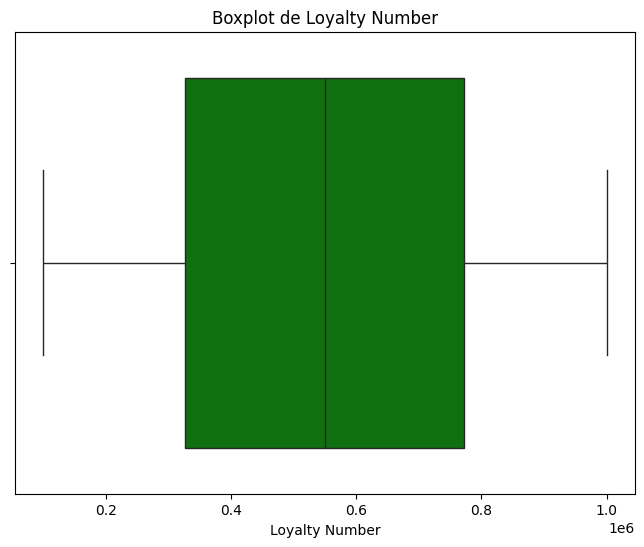

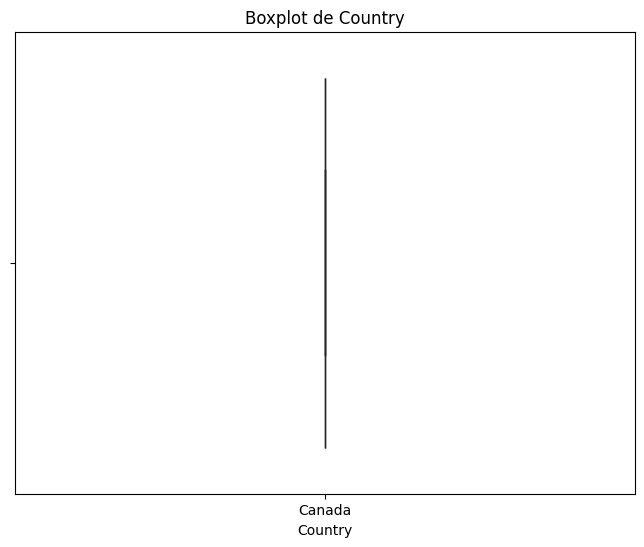

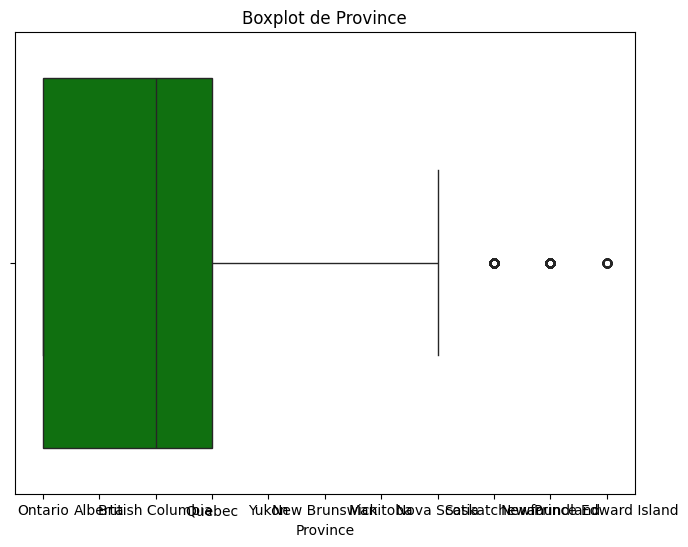

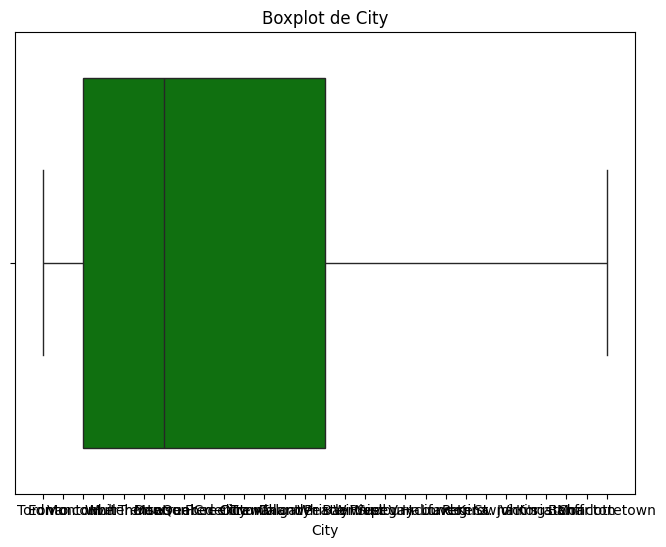

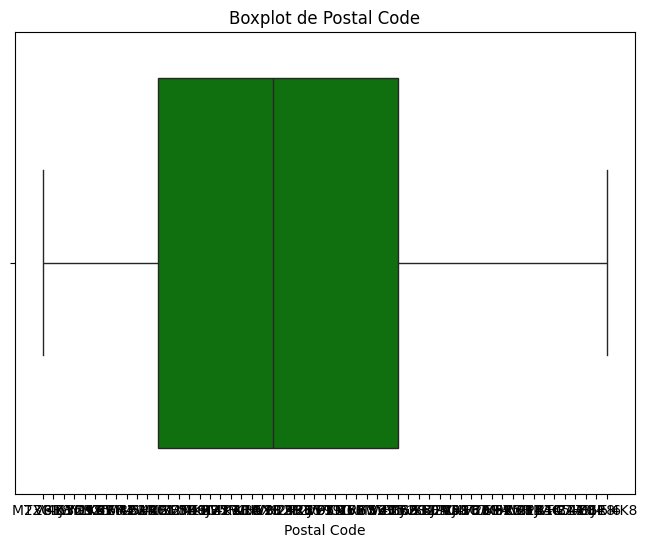

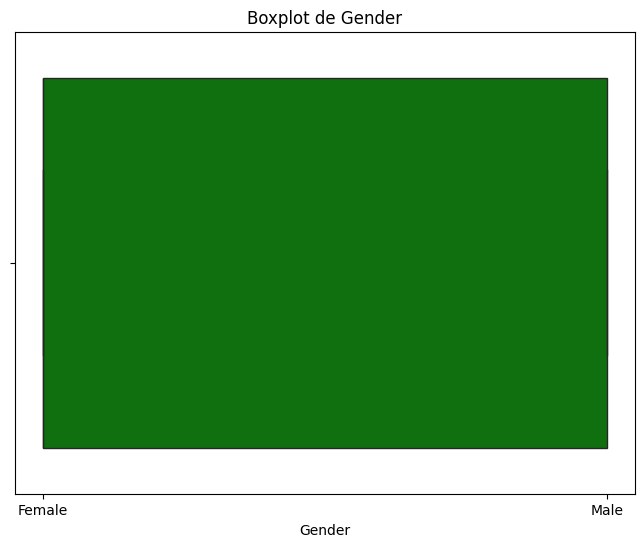

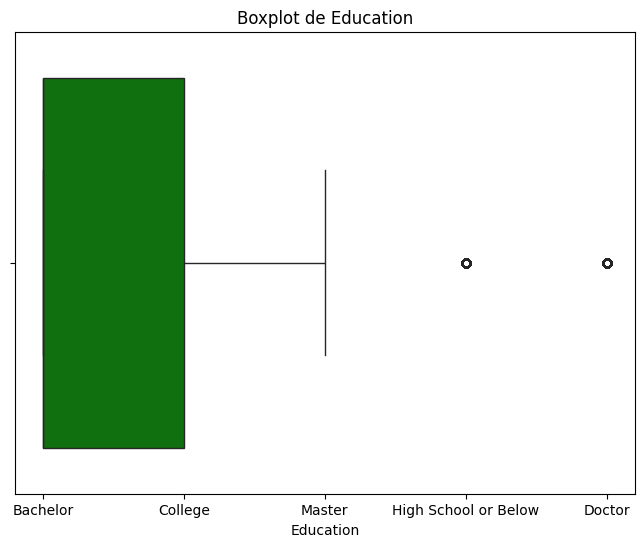

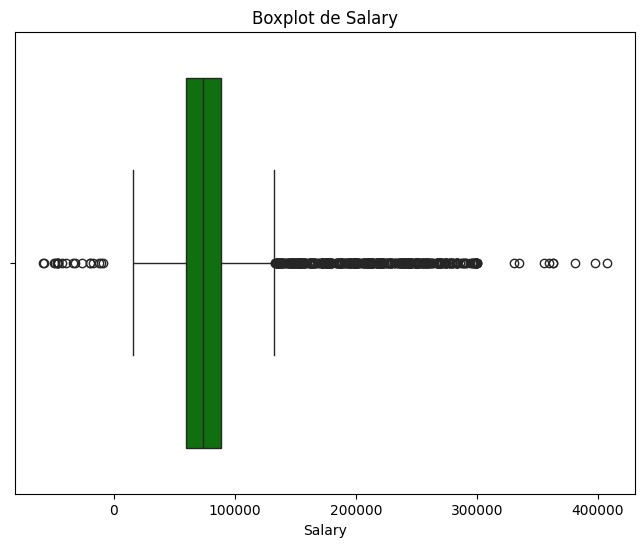

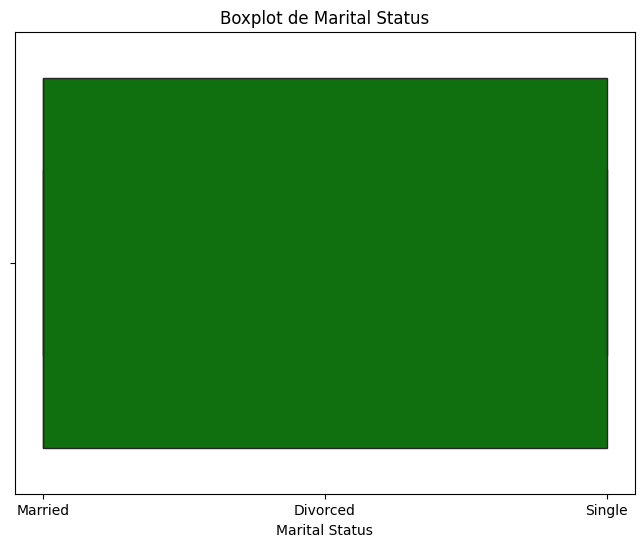

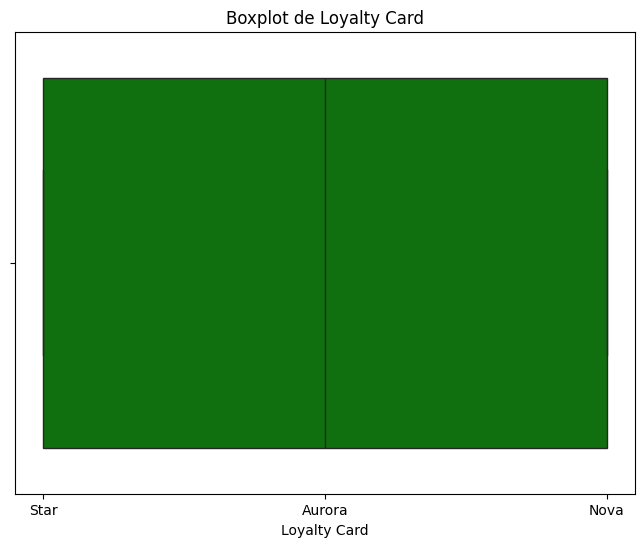

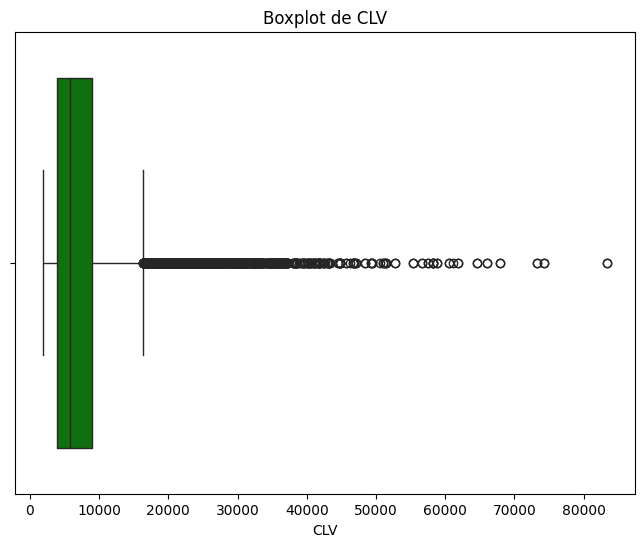

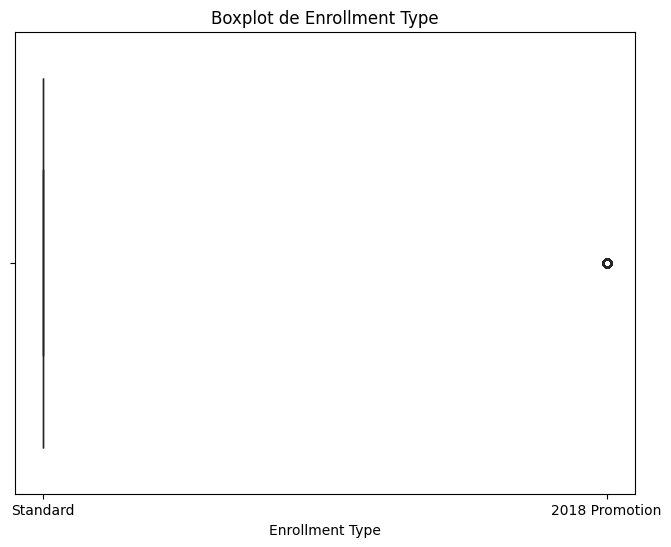

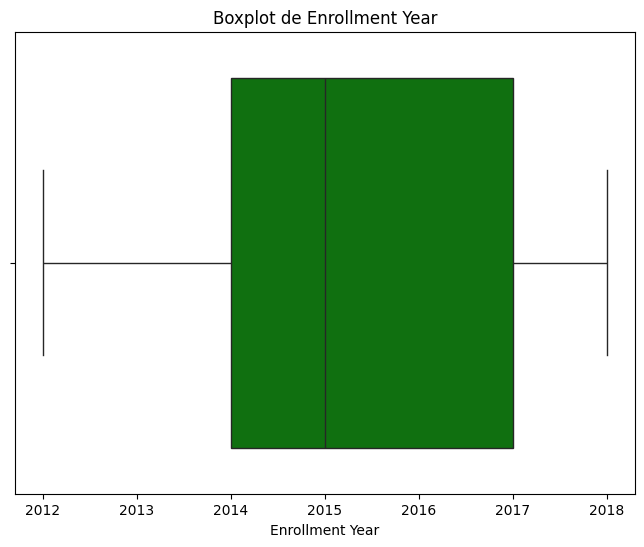

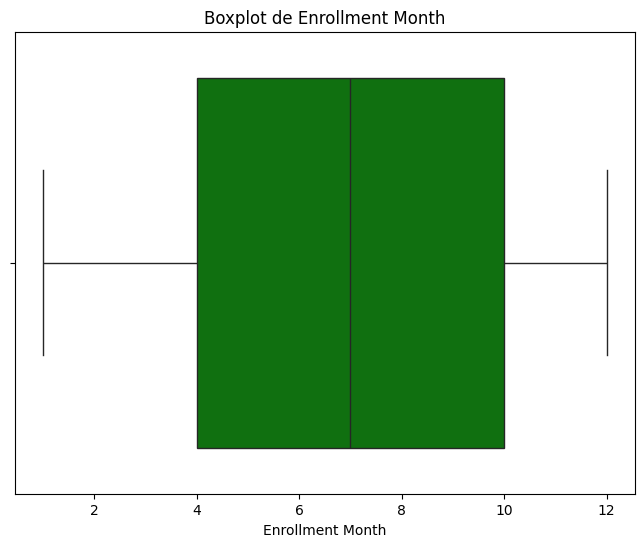

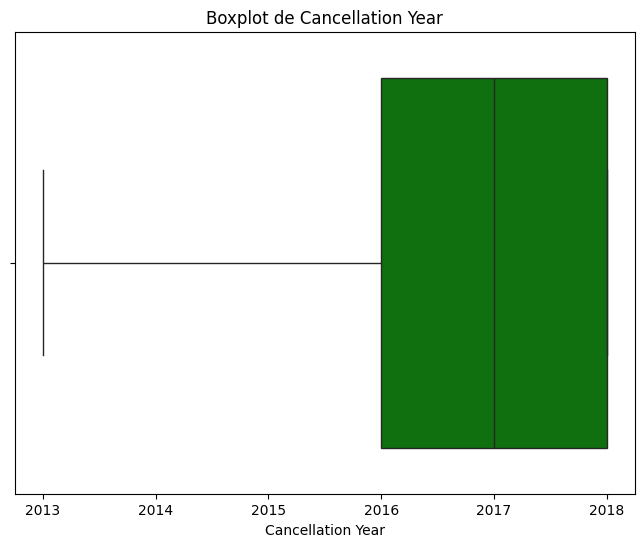

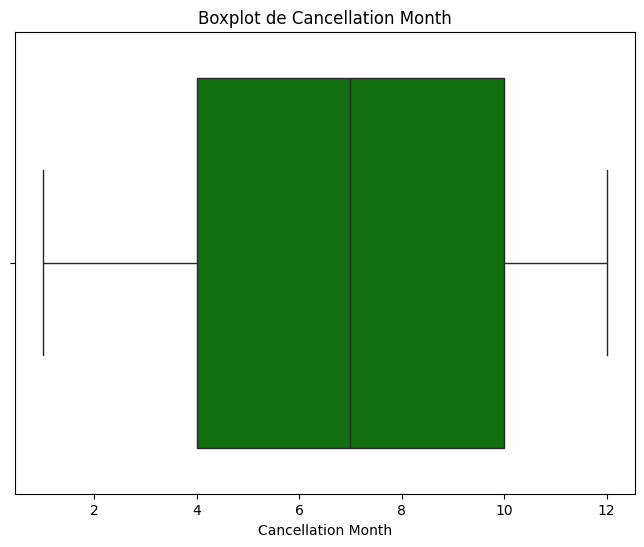

In [43]:
# Muetro la distribución en gráficos LOYALTY

for column_1 in df_activity_loyalty.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df_activity_loyalty[column_1], color='green')
    plt.title(f'Boxplot de {column_1}')
    plt.xlabel(column_1)
    plt.show()


In [44]:
# Al ver que los valores nulos se concentran en Salary, Cancellation Month y Cancellation Year, analizo más los datos:

rows_with_nulls_loyalty = df_activity_loyalty[df_activity_loyalty[['Salary', 'Cancellation Month', 'Cancellation Year']].isnull().any(axis=1)]
print(rows_with_nulls_loyalty[['Salary', 'Cancellation Month', 'Cancellation Year']])


         Salary  Cancellation Month  Cancellation Year
0       83236.0                 NaN                NaN
1           NaN                 NaN                NaN
2           NaN                 1.0             2018.0
3           NaN                 NaN                NaN
4      103495.0                 NaN                NaN
...         ...                 ...                ...
16731       NaN                 NaN                NaN
16732       NaN                 NaN                NaN
16733   89210.0                 NaN                NaN
16734       NaN                 NaN                NaN
16735  -57297.0                 NaN                NaN

[15197 rows x 3 columns]


In [45]:
# valores duplicados de flight
values_duplicated_flight = df_activity_flight.duplicated()
df_activity_flight[values_duplicated_flight]

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
42,101902,2017,1,0,0,0,0,0.0,0,0
227,112142,2017,1,0,0,0,0,0.0,0,0
478,126100,2017,1,0,0,0,0,0.0,0,0
567,130331,2017,1,0,0,0,0,0.0,0,0
660,135421,2017,1,0,0,0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...
404668,949628,2018,12,0,0,0,0,0.0,0,0
404884,960050,2018,12,0,0,0,0,0.0,0,0
405111,971370,2018,12,0,0,0,0,0.0,0,0
405410,988392,2018,12,0,0,0,0,0.0,0,0


In [46]:
# valores duplicados de loyalty
values_duplicated_loyalty = df_activity_loyalty.duplicated()
df_activity_loyalty[values_duplicated_loyalty]

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month


In [47]:

# Elimino los duplicados usando el método .drop()
# inplace = True porque queremos que los cambios realizados se sobreescriban en el DataFrame

df_activity_flight.drop_duplicates(inplace=True)
df_activity_flight.shape

(403760, 10)

In [48]:
# Compruebo que no hay duplicados
values_duplicated_flight = df_activity_flight.duplicated()
df_activity_flight[values_duplicated_flight]

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed


##### C) DF_UNION

In [49]:
# Una vez que he analizado los dos data frame y que he quitado los duplicados de 'Customer Flight Activity' uno los dos data frame. 
# Utilizo merge porque los dos tienen 'Loyalty number', que es el id del cliente.

df_union = df_activity_flight.merge(df_activity_loyalty, how='left', on='Loyalty Number')
df_union

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
1,100102,2017,1,10,4,14,2030,203.0,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,College,NaN,Single,Nova,2887.74,Standard,2013,3,NaN,NaN
2,100140,2017,1,6,0,6,1200,120.0,0,0,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,College,NaN,Divorced,Nova,2838.07,Standard,2016,7,NaN,NaN
3,100214,2017,1,0,0,0,0,0.0,0,0,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,63253.0,Married,Star,4170.57,Standard,2015,8,NaN,NaN
4,100272,2017,1,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,P1L 8X8,Female,Bachelor,91163.0,Divorced,Star,6622.05,Standard,2014,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403755,999902,2018,12,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,College,NaN,Married,Aurora,7290.07,Standard,2014,5,NaN,NaN
403756,999911,2018,12,0,0,0,0,0.0,0,0,Canada,Newfoundland,St. John's,A1C 6H9,Male,Doctor,217943.0,Single,Nova,8564.77,Standard,2012,8,NaN,NaN
403757,999940,2018,12,3,0,3,1233,123.0,0,0,Canada,Quebec,Quebec City,G1B 3L5,Female,Bachelor,47670.0,Married,Nova,20266.50,Standard,2017,7,NaN,NaN
403758,999982,2018,12,0,0,0,0,0.0,0,0,Canada,British Columbia,Victoria,V10 6T5,Male,College,NaN,Married,Star,2631.56,Standard,2018,7,NaN,NaN


In [50]:
df_union.shape

(403760, 25)

In [51]:
df_union.head()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
1,100102,2017,1,10,4,14,2030,203.0,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,College,NaN,Single,Nova,2887.74,Standard,2013,3,NaN,NaN
2,100140,2017,1,6,0,6,1200,120.0,0,0,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,College,NaN,Divorced,Nova,2838.07,Standard,2016,7,NaN,NaN
3,100214,2017,1,0,0,0,0,0.0,0,0,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,63253.0,Married,Star,4170.57,Standard,2015,8,NaN,NaN
4,100272,2017,1,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,P1L 8X8,Female,Bachelor,91163.0,Divorced,Star,6622.05,Standard,2014,1,NaN,NaN


In [52]:
df_union.columns

Index(['Loyalty Number', 'Year', 'Month', 'Flights Booked',
       'Flights with Companions', 'Total Flights', 'Distance',
       'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed',
       'Country', 'Province', 'City', 'Postal Code', 'Gender', 'Education',
       'Salary', 'Marital Status', 'Loyalty Card', 'CLV', 'Enrollment Type',
       'Enrollment Year', 'Enrollment Month', 'Cancellation Year',
       'Cancellation Month'],
      dtype='object')

### 1.2 Limpieza de datos

#### - Elimina o trata los valores nulso, si los hay, en las columnas clave para asegurar que los datos estén completos.
#### - Verifica la consistencia y corrección de los datos para asegurarte de qeu los datos se presenten de forma coherente.
#### - Realiza cualquier ajuste o conversión necesaria en las columnas para garantizar la adecuación de los datos para el análisis estadístico.

In [53]:
# Primero hago una copia del original:
df_union_1 = df_union.copy()
df_union_1.head()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
1,100102,2017,1,10,4,14,2030,203.0,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,College,NaN,Single,Nova,2887.74,Standard,2013,3,NaN,NaN
2,100140,2017,1,6,0,6,1200,120.0,0,0,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,College,NaN,Divorced,Nova,2838.07,Standard,2016,7,NaN,NaN
3,100214,2017,1,0,0,0,0,0.0,0,0,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,63253.0,Married,Star,4170.57,Standard,2015,8,NaN,NaN
4,100272,2017,1,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,P1L 8X8,Female,Bachelor,91163.0,Divorced,Star,6622.05,Standard,2014,1,NaN,NaN


In [54]:
df_union.value_counts()

Loyalty Number  Year  Month  Flights Booked  Flights with Companions  Total Flights  Distance  Points Accumulated  Points Redeemed  Dollar Cost Points Redeemed  Country  Province          City          Postal Code  Gender  Education             Salary    Marital Status  Loyalty Card  CLV      Enrollment Type  Enrollment Year  Enrollment Month  Cancellation Year  Cancellation Month
100504          2017  1      0               0                        0              0         0.0                 0                0                            Canada   Ontario           Sudbury       M5V 1G5      Female  Bachelor              75638.0   Divorced        Nova          8807.61  Standard         2017             7                 2018.0             3.0                   1
699220          2017  4      0               0                        0              0         0.0                 0                0                            Canada   Ontario           Ottawa        K1F 2R2      Male    Bach

In [55]:
# Itero por todas las columnas del DataFrame y pongo cada título en minúsculas.
new_columns = {columna: columna.lower().replace(".", "") for columna in df_union.columns}

new_columns

{'Loyalty Number': 'loyalty number',
 'Year': 'year',
 'Month': 'month',
 'Flights Booked': 'flights booked',
 'Flights with Companions': 'flights with companions',
 'Total Flights': 'total flights',
 'Distance': 'distance',
 'Points Accumulated': 'points accumulated',
 'Points Redeemed': 'points redeemed',
 'Dollar Cost Points Redeemed': 'dollar cost points redeemed',
 'Country': 'country',
 'Province': 'province',
 'City': 'city',
 'Postal Code': 'postal code',
 'Gender': 'gender',
 'Education': 'education',
 'Salary': 'salary',
 'Marital Status': 'marital status',
 'Loyalty Card': 'loyalty card',
 'CLV': 'clv',
 'Enrollment Type': 'enrollment type',
 'Enrollment Year': 'enrollment year',
 'Enrollment Month': 'enrollment month',
 'Cancellation Year': 'cancellation year',
 'Cancellation Month': 'cancellation month'}

In [56]:
# Una vez que tengo el diccionario creado, aplico método rename
df_union.rename(columns = new_columns, inplace = True)

df_union.head()

,loyalty number,year,month,flights booked,flights with companions,total flights,distance,points accumulated,points redeemed,dollar cost points redeemed,country,province,city,postal code,gender,education,salary,marital status,loyalty card,clv,enrollment type,enrollment year,enrollment month,cancellation year,cancellation month
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
1,100102,2017,1,10,4,14,2030,203.0,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,College,NaN,Single,Nova,2887.74,Standard,2013,3,NaN,NaN
2,100140,2017,1,6,0,6,1200,120.0,0,0,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,College,NaN,Divorced,Nova,2838.07,Standard,2016,7,NaN,NaN
3,100214,2017,1,0,0,0,0,0.0,0,0,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,63253.0,Married,Star,4170.57,Standard,2015,8,NaN,NaN
4,100272,2017,1,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,P1L 8X8,Female,Bachelor,91163.0,Divorced,Star,6622.05,Standard,2014,1,NaN,NaN


In [57]:
# Reemplazo el espacio por _
new_columns_1 = df_union.columns
new_columns = [name.title().lower().strip().replace(' ', '_') for name in new_columns]
df_union.columns = new_columns
df_union.tail()

,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month
403755,999902,2018,12,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,College,NaN,Married,Aurora,7290.07,Standard,2014,5,NaN,NaN
403756,999911,2018,12,0,0,0,0,0.0,0,0,Canada,Newfoundland,St. John's,A1C 6H9,Male,Doctor,217943.0,Single,Nova,8564.77,Standard,2012,8,NaN,NaN
403757,999940,2018,12,3,0,3,1233,123.0,0,0,Canada,Quebec,Quebec City,G1B 3L5,Female,Bachelor,47670.0,Married,Nova,20266.50,Standard,2017,7,NaN,NaN
403758,999982,2018,12,0,0,0,0,0.0,0,0,Canada,British Columbia,Victoria,V10 6T5,Male,College,NaN,Married,Star,2631.56,Standard,2018,7,NaN,NaN
403759,999986,2018,12,0,0,0,0,0.0,0,0,Canada,Ontario,Ottawa,K1F 2R2,Female,Bachelor,46594.0,Married,Nova,8257.01,2018 Promotion,2018,2,NaN,NaN


In [58]:
df_union['loyalty_number']

0         100018
1         100102
2         100140
3         100214
4         100272
           ...  
403755    999902
403756    999911
403757    999940
403758    999982
403759    999986
Name: loyalty_number, Length: 403760, dtype: int64

In [59]:
# Quiero saber cuantos  clientes tenemos hay únicos
df_union['loyalty_number'].nunique()

16737

In [62]:
# Número total de filas duplicadas
num_duplicated_total = df_union.duplicated().sum()

# Número total de filas en el DataFrame
total_rows_total = len(df_union)

# Calcular el porcentaje de filas duplicadas
percent_duplicated_total = (num_duplicated_total / total_rows_total) * 100

print(f'Porcentaje de filas duplicadas: {percent_duplicated_total:.2f}%')

Porcentaje de filas duplicadas: 0.00%


In [63]:
# cuantos clientes repiten
df_union['loyalty_number'].duplicated().sum()

387023

In [64]:
# Analizo los valores negativos de salario
value_negative_salary = df_union[df_union ['salary'] < 0]
value_negative_salary

,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month
291,115505,2017,1,0,0,0,0,0.0,0,0,Canada,Newfoundland,St. John's,A1C 6H9,Male,Bachelor,-10605.0,Married,Nova,5860.17,2018 Promotion,2018,4,NaN,NaN
956,152016,2017,1,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,P1J 8T7,Female,Bachelor,-58486.0,Married,Aurora,5067.21,2018 Promotion,2018,2,NaN,NaN
1716,194065,2017,1,0,0,0,0,0.0,0,0,Canada,Ontario,Sudbury,M5V 1G5,Female,Bachelor,-31911.0,Married,Nova,2888.85,2018 Promotion,2018,2,NaN,NaN
2081,212128,2017,1,3,0,3,1959,195.0,0,0,Canada,Ontario,Toronto,P2T 6G3,Male,Bachelor,-49001.0,Married,Nova,3130.68,2018 Promotion,2018,2,NaN,NaN
2433,232755,2017,1,0,0,0,0,0.0,0,0,Canada,British Columbia,Vancouver,V1E 4R6,Female,Bachelor,-46683.0,Single,Nova,4787.81,2018 Promotion,2018,3,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398813,734647,2018,12,15,0,15,1440,144.0,0,0,Canada,Saskatchewan,Regina,S1J 3C5,Male,Bachelor,-46303.0,Married,Nova,11280.73,2018 Promotion,2018,4,NaN,NaN
399884,790475,2018,12,7,1,8,1056,105.0,0,0,Canada,Ontario,Trenton,K8V 4B2,Female,Bachelor,-34079.0,Married,Nova,12913.50,2018 Promotion,2018,2,NaN,NaN
402017,906428,2018,12,13,0,13,2912,291.0,0,0,Canada,Yukon,Whitehorse,Y2K 6R0,Male,Bachelor,-57297.0,Married,Star,10018.66,2018 Promotion,2018,4,NaN,NaN
402459,430398,2018,12,5,5,10,660,66.0,539,44,Canada,Newfoundland,St. John's,A1C 6H9,Male,Bachelor,-17534.0,Married,Nova,49423.80,2018 Promotion,2018,3,NaN,NaN


In [ ]:
# Número de valores negativos
df_union[df_union["salary"]<0].shape

(480, 25)

In [101]:
# Cuento cuántos valores negativos hay en cada columna del Data Frame
negative_summary = mask_negative.sum()

negative_summary


loyalty_number                   0
year                             0
month                            0
flights_booked                   0
flights_with_companions          0
total_flights                    0
distance                         0
points_accumulated               0
points_redeemed                  0
dollar_cost_points_redeemed      0
country                          0
province                         0
city                             0
postal_code                      0
gender                           0
education                        0
salary                         480
marital_status                   0
loyalty_card                     0
clv                              0
enrollment_type                  0
enrollment_year                  0
enrollment_month                 0
cancellation_year                0
cancellation_month               0
dtype: int64

In [67]:
# Convierto las columnas a un tipo numérico /  errors ='coerce' es ignorar errores
df_union_numeric = df_union.apply(pd.to_numeric, errors='coerce')

# Creo una máscara booleana para identificar valores negativos 
mask_negative = df_union_numeric < 0

# Filtro el DataFrame con la máscara para mostrar solo los valores negativos
negative_values = df_union_numeric[mask_negative]

negative_values.shape

(403760, 25)

In [69]:
# Muestro todas las posiciones de los valores negativos de salary
negative_positions = df_union_numeric[mask_negative].stack()

negative_positions


291     salary   -10605.0
956     salary   -58486.0
1716    salary   -31911.0
2081    salary   -49001.0
2433    salary   -46683.0
                   ...   
398813  salary   -46303.0
399884  salary   -34079.0
402017  salary   -57297.0
402459  salary   -17534.0
403021  salary   -12497.0
Length: 480, dtype: float64

In [70]:
# Cambio las cantidades de salario negativas a positivo
df_union['salary'] = df_union['salary'].abs()

df_union['salary'].min()

9081.0

In [71]:
# Relaciono el salario en función de la educación
df_union.groupby('education')['salary'].describe()

,count,mean,std,min,25%,50%,75%,max
education,,,,,,,,
Bachelor,252567.0,72599.080913,16667.675569,9081.0,58711.0,71972.0,85866.0,105563.0
College,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Doctor,17731.0,178403.675202,70380.054033,48109.0,124407.0,180440.0,236612.0,407228.0
High School or Below,18915.0,61146.378165,12105.350590,21853.0,52054.0,61806.0,71344.0,93875.0
Master,12287.0,103734.523724,17518.492270,56414.0,88120.0,105487.0,118530.0,133080.0


In [126]:

# Selecciono solo College dentro de Education
grupo_college = df_union[df_union['education'] == 'College']
grupo_college

# Selecciono solo las columnas Education- College y Salary
college_data_subset = grupo_college[['education', 'salary']]
college_data_subset



,education,salary
1,College,NaN
2,College,NaN
17,College,NaN
20,College,NaN
21,College,NaN
...,...,...
403747,College,NaN
403749,College,NaN
403752,College,NaN
403755,College,NaN


In [73]:
# Porcentaje de nulos
df_union.isna().sum()/df_union.shape[0]*100

loyalty_number                  0.000000
year                            0.000000
month                           0.000000
flights_booked                  0.000000
flights_with_companions         0.000000
total_flights                   0.000000
distance                        0.000000
points_accumulated              0.000000
points_redeemed                 0.000000
dollar_cost_points_redeemed     0.000000
country                         0.000000
province                        0.000000
city                            0.000000
postal_code                     0.000000
gender                          0.000000
education                       0.000000
salary                         25.326927
marital_status                  0.000000
loyalty_card                    0.000000
clv                             0.000000
enrollment_type                 0.000000
enrollment_year                 0.000000
enrollment_month                0.000000
cancellation_year              87.703091
cancellation_mon

In [127]:
# Calculo el porcentaje de valores nulos en grupo_college

grupo_college.isna().sum()/df_union.shape[0]*100

loyalty_number                  0.000000
year                            0.000000
month                           0.000000
flights_booked                  0.000000
flights_with_companions         0.000000
total_flights                   0.000000
distance                        0.000000
points_accumulated              0.000000
points_redeemed                 0.000000
dollar_cost_points_redeemed     0.000000
country                         0.000000
province                        0.000000
city                            0.000000
postal_code                     0.000000
gender                          0.000000
education                       0.000000
salary                         25.326927
marital_status                  0.000000
loyalty_card                    0.000000
clv                             0.000000
enrollment_type                 0.000000
cancellation_month_year         0.000000
enrollment_month_year           0.000000
dtype: float64

In [128]:
# Calculo el porcentaje de valores nulos en cada columna de grupo_college, basado en su propio tamaño
porcentaje_nulos = grupo_college.isna().sum() / grupo_college.shape[0] * 100

print(porcentaje_nulos)

loyalty_number                   0.0
year                             0.0
month                            0.0
flights_booked                   0.0
flights_with_companions          0.0
total_flights                    0.0
distance                         0.0
points_accumulated               0.0
points_redeemed                  0.0
dollar_cost_points_redeemed      0.0
country                          0.0
province                         0.0
city                             0.0
postal_code                      0.0
gender                           0.0
education                        0.0
salary                         100.0
marital_status                   0.0
loyalty_card                     0.0
clv                              0.0
enrollment_type                  0.0
cancellation_month_year          0.0
enrollment_month_year            0.0
dtype: float64


In [130]:
# Reemplazo los valores NaN en la columna 'salary' con 0 en el DataFrame original

df_union['salary'] = df_union['salary'].fillna(0)

# Filtro los datos después de haber reemplazado los NaN
grupo_college_1 = df_union[df_union["education"] == "college"]


print(grupo_college_1['salary'].head())

Series([], Name: salary, dtype: float64)


In [131]:
# Filtro resto de grupos
resto_grupos = df_union[df_union["education"] != "College"]
resto_grupos

,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,cancellation_month_year,enrollment_month_year
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,0/0,8/2016
3,100214,2017,1,0,0,0,0,0.0,0,0,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,63253.0,Married,Star,4170.57,Standard,0/0,8/2015
4,100272,2017,1,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,P1L 8X8,Female,Bachelor,91163.0,Divorced,Star,6622.05,Standard,0/0,1/2014
5,100301,2017,1,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,P1J 8T7,Male,Bachelor,70323.0,Divorced,Nova,48356.96,Standard,0/0,9/2013
6,100364,2017,1,0,0,0,0,0.0,0,0,Canada,Saskatchewan,Regina,S6J 3G0,Male,Bachelor,76849.0,Married,Nova,5143.88,Standard,0/0,5/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403753,999891,2018,11,0,0,0,0,0.0,0,0,Canada,Nova Scotia,Halifax,B3J 9S2,Female,Bachelor,75616.0,Married,Nova,3745.37,Standard,1/2017,5/2016
403754,999891,2018,12,0,0,0,0,0.0,0,0,Canada,Nova Scotia,Halifax,B3J 9S2,Female,Bachelor,75616.0,Married,Nova,3745.37,Standard,1/2017,5/2016
403756,999911,2018,12,0,0,0,0,0.0,0,0,Canada,Newfoundland,St. John's,A1C 6H9,Male,Doctor,217943.0,Single,Nova,8564.77,Standard,0/0,8/2012
403757,999940,2018,12,3,0,3,1233,123.0,0,0,Canada,Quebec,Quebec City,G1B 3L5,Female,Bachelor,47670.0,Married,Nova,20266.50,Standard,0/0,7/2017


In [77]:
df_union['cancellation_year'].unique()

array([  nan, 2018., 2015., 2016., 2014., 2013., 2017.])

In [78]:
df_union['cancellation_month'].unique()

array([nan,  3.,  9.,  2.,  7.,  6.,  8.,  4.,  1.,  5., 11., 12., 10.])

In [79]:
# Reemplazo los valores nulos de Cancellation year y cancellation month por 0 para poder quitar el punto de atrás de los números

df_union[['cancellation_year', 'cancellation_month']] = df_union[['cancellation_year', 'cancellation_month']].fillna(0)

print(df_union[['cancellation_year', 'cancellation_month']].head())


   cancellation_year  cancellation_month
0                0.0                 0.0
1                0.0                 0.0
2                0.0                 0.0
3                0.0                 0.0
4                0.0                 0.0


In [80]:
# Convierto la columna a tipo numérico para poder reemplazar los valores NaN por 0
df_union['cancellation_year'] = pd.to_numeric(df_union['cancellation_year'], errors='coerce')

# Reemplazo los valores NaN por 0
df_union['cancellation_year'] = df_union['cancellation_year'].fillna(0)

print(df_union[['cancellation_year']].head())


   cancellation_year
0                0.0
1                0.0
2                0.0
3                0.0
4                0.0


In [81]:
df_union['cancellation_year'] = df_union['cancellation_year'].astype(int)
df_union['cancellation_month'] = df_union['cancellation_month'].astype(int)

In [82]:
# Chequeo que el cambio se ha hecho correctamente
df_union['cancellation_year'].unique()

array([   0, 2018, 2015, 2016, 2014, 2013, 2017])

In [83]:
df_union.head(3)

,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,College,NaN,Single,Nova,2887.74,Standard,2013,3,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,College,NaN,Divorced,Nova,2838.07,Standard,2016,7,0,0


In [84]:
# Concateno las columnas de cancellation_month y cancelation_year en una sola llamada cancellation_month_year y separo los datos con un/.
df_union['cancellation_month_year'] = df_union['cancellation_month'].astype(str) + '/' + df_union['cancellation_year'].astype(str)

# Elimino las columnas originales
df_union = df_union.drop(columns=['cancellation_month', 'cancellation_year'])

df_union


,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_month_year
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,0/0
1,100102,2017,1,10,4,14,2030,203.0,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,College,NaN,Single,Nova,2887.74,Standard,2013,3,0/0
2,100140,2017,1,6,0,6,1200,120.0,0,0,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,College,NaN,Divorced,Nova,2838.07,Standard,2016,7,0/0
3,100214,2017,1,0,0,0,0,0.0,0,0,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,63253.0,Married,Star,4170.57,Standard,2015,8,0/0
4,100272,2017,1,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,P1L 8X8,Female,Bachelor,91163.0,Divorced,Star,6622.05,Standard,2014,1,0/0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403755,999902,2018,12,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,College,NaN,Married,Aurora,7290.07,Standard,2014,5,0/0
403756,999911,2018,12,0,0,0,0,0.0,0,0,Canada,Newfoundland,St. John's,A1C 6H9,Male,Doctor,217943.0,Single,Nova,8564.77,Standard,2012,8,0/0
403757,999940,2018,12,3,0,3,1233,123.0,0,0,Canada,Quebec,Quebec City,G1B 3L5,Female,Bachelor,47670.0,Married,Nova,20266.50,Standard,2017,7,0/0
403758,999982,2018,12,0,0,0,0,0.0,0,0,Canada,British Columbia,Victoria,V10 6T5,Male,College,NaN,Married,Star,2631.56,Standard,2018,7,0/0


In [85]:
# Concateno las columnas de enrollment_month y enrollment_year en una sola llamada enrollment_month_year y separo los datos con un/.
df_union['enrollment_month_year'] = df_union['enrollment_month'].astype(str) + '/' + df_union['enrollment_year'].astype(str)

# Elimino las columnas originales
df_union = df_union.drop(columns=['enrollment_month', 'enrollment_year'])

df_union

,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,cancellation_month_year,enrollment_month_year
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,0/0,8/2016
1,100102,2017,1,10,4,14,2030,203.0,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,College,NaN,Single,Nova,2887.74,Standard,0/0,3/2013
2,100140,2017,1,6,0,6,1200,120.0,0,0,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,College,NaN,Divorced,Nova,2838.07,Standard,0/0,7/2016
3,100214,2017,1,0,0,0,0,0.0,0,0,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,63253.0,Married,Star,4170.57,Standard,0/0,8/2015
4,100272,2017,1,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,P1L 8X8,Female,Bachelor,91163.0,Divorced,Star,6622.05,Standard,0/0,1/2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403755,999902,2018,12,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,College,NaN,Married,Aurora,7290.07,Standard,0/0,5/2014
403756,999911,2018,12,0,0,0,0,0.0,0,0,Canada,Newfoundland,St. John's,A1C 6H9,Male,Doctor,217943.0,Single,Nova,8564.77,Standard,0/0,8/2012
403757,999940,2018,12,3,0,3,1233,123.0,0,0,Canada,Quebec,Quebec City,G1B 3L5,Female,Bachelor,47670.0,Married,Nova,20266.50,Standard,0/0,7/2017
403758,999982,2018,12,0,0,0,0,0.0,0,0,Canada,British Columbia,Victoria,V10 6T5,Male,College,NaN,Married,Star,2631.56,Standard,0/0,7/2018


In [88]:
# Muestro valores únicos, frecuencias, porcentajes, moda y nulos

def unique_values_cal(df_union, columna):
    unique_values = df_union[columna].unique()
    print(f"Sus valores únicos son: {unique_values}\n")

def frecuency_cal(df_union, columna):
    frecuency= df_union[columna].value_counts()
    print(f"Las frecuencias de los valores únicos son: \n{frecuency}\n")

def percent_cal(df_union, columna):
    percent = df_union[columna].value_counts(normalize=True) * 100
    print(f"Los porcentajes de los valores únicos son: \n{percent}\n")

def mode_cal(df_union, columna):
    mode = df_union[columna].mode()[0]
    print(f"La moda de la columna '{columna}' es: {mode}\n")

def nulls_cal(df_union, columna):
    nulls = df_union[columna].isnull().sum()
    print(f"Número de valores nulos en '{columna}': {nulls}\n")

# Listo las columnas a analizar
category_cal = df_union.columns
print(f"Las columnas son {category_cal}")

# Itero sobre las columnas y aplico las funciones
for columna in category_cal:
    print(f"\n COLUMNA: '{columna.upper()}'\n")
    
    unique_values_cal(df_union, columna)
    frecuency_cal(df_union, columna)
    percent_cal(df_union, columna)
    mode_cal(df_union, columna)
    nulls_cal(df_union, columna)



Las columnas son Index(['loyalty_number', 'year', 'month', 'flights_booked',
       'flights_with_companions', 'total_flights', 'distance',
       'points_accumulated', 'points_redeemed', 'dollar_cost_points_redeemed',
       'country', 'province', 'city', 'postal_code', 'gender', 'education',
       'salary', 'marital_status', 'loyalty_card', 'clv', 'enrollment_type',
       'cancellation_month_year', 'enrollment_month_year'],
      dtype='object')

 COLUMNA: 'LOYALTY_NUMBER'

Sus valores únicos son: [100018 100102 100140 ... 999731 999788 999891]

Las frecuencias de los valores únicos son: 
loyalty_number
974875    48
736504    48
890702    48
617489    48
200519    47
          ..
428402    24
428452    24
428520    24
428523    24
999891    24
Name: count, Length: 16737, dtype: int64

Los porcentajes de los valores únicos son: 
loyalty_number
974875    0.011888
736504    0.011888
890702    0.011888
617489    0.011888
200519    0.011641
            ...   
428402    0.005944
428452  

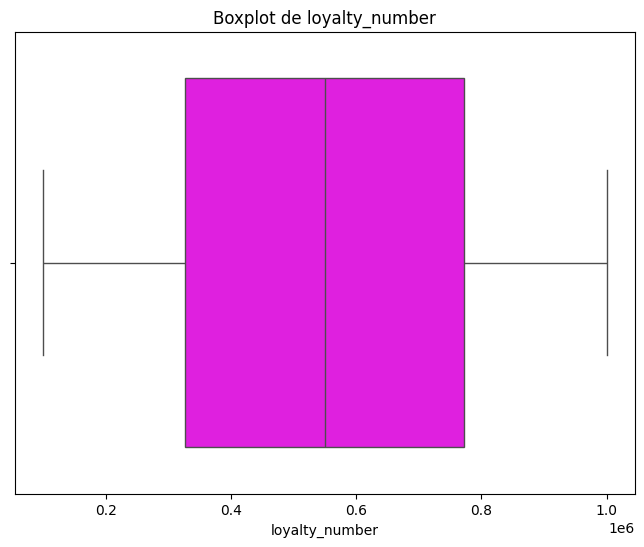

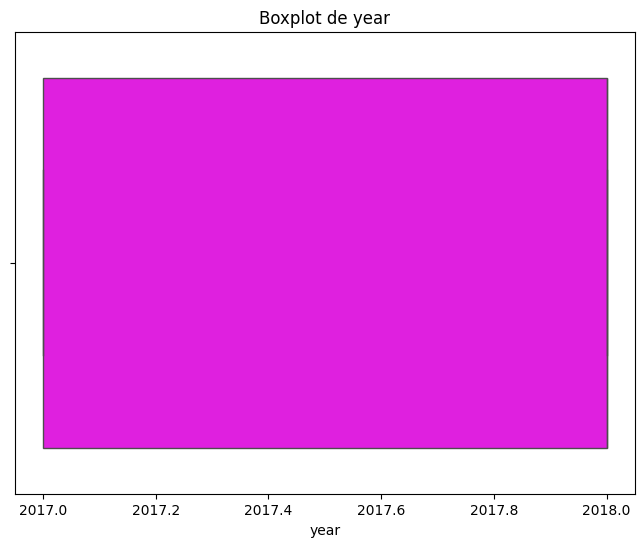

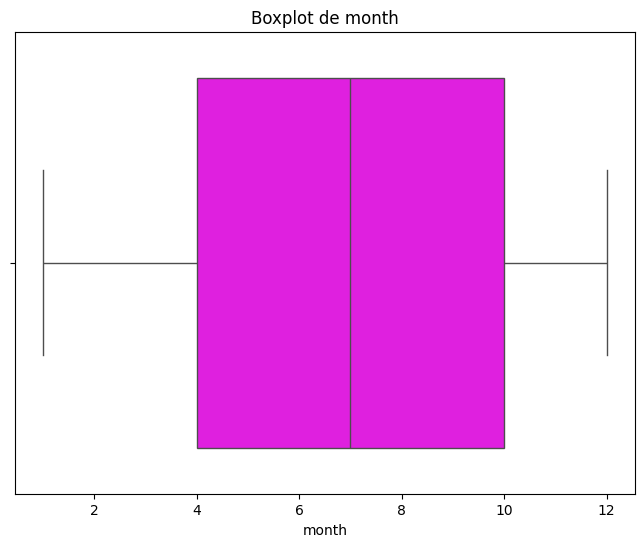

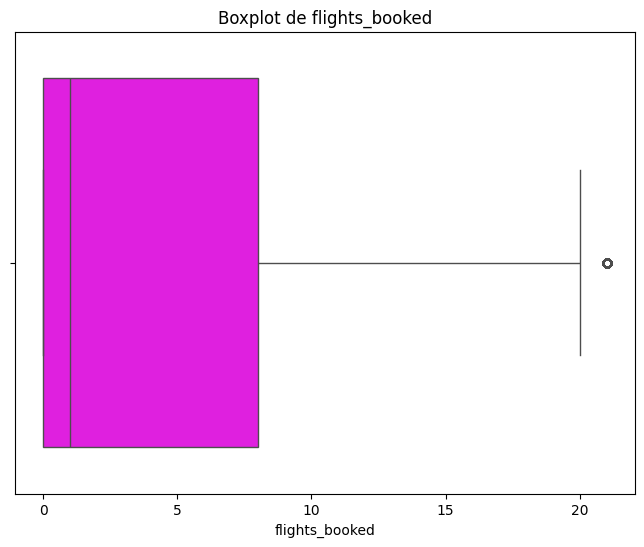

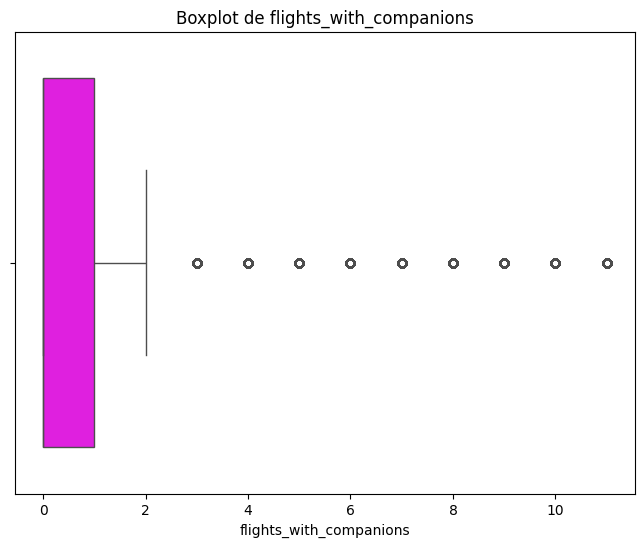

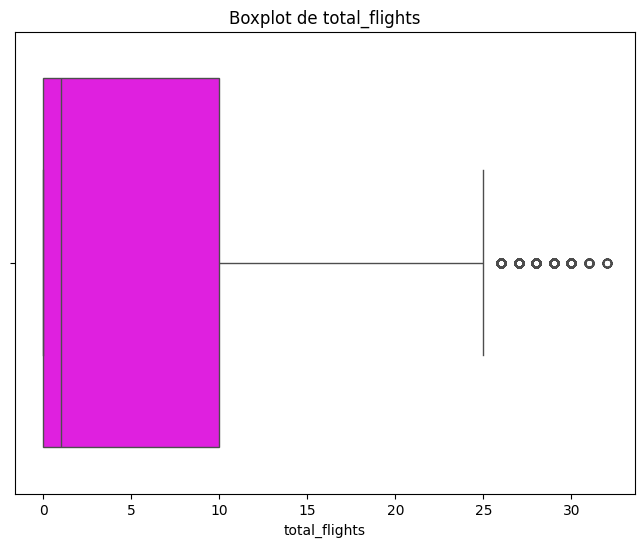

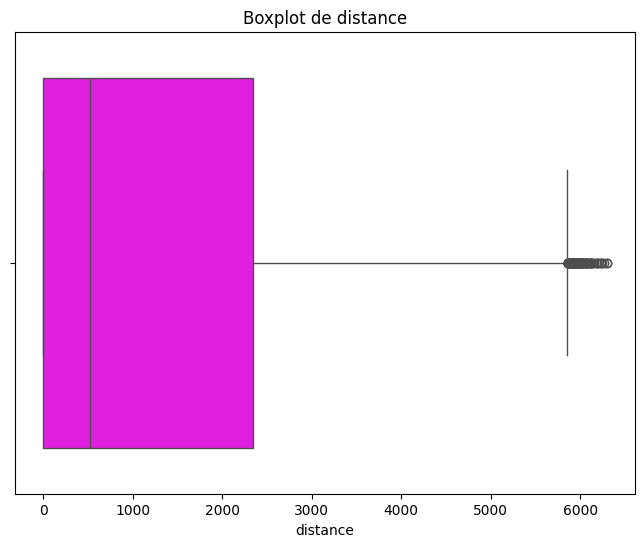

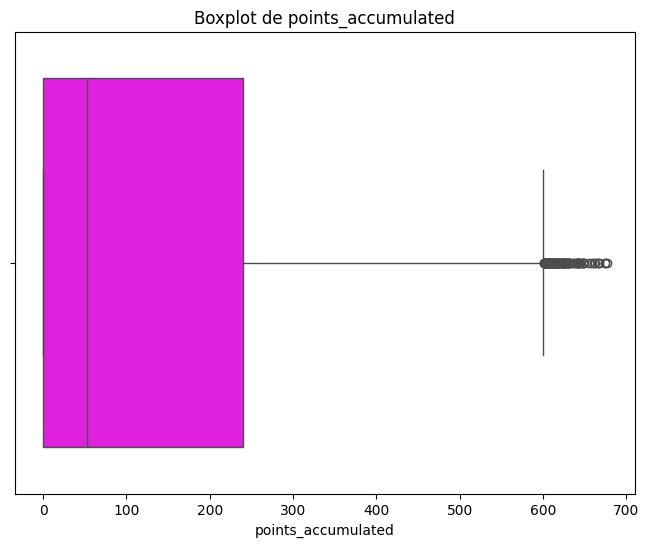

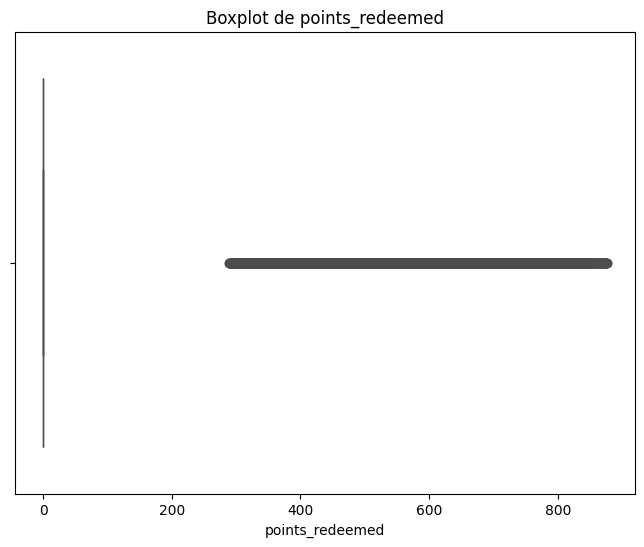

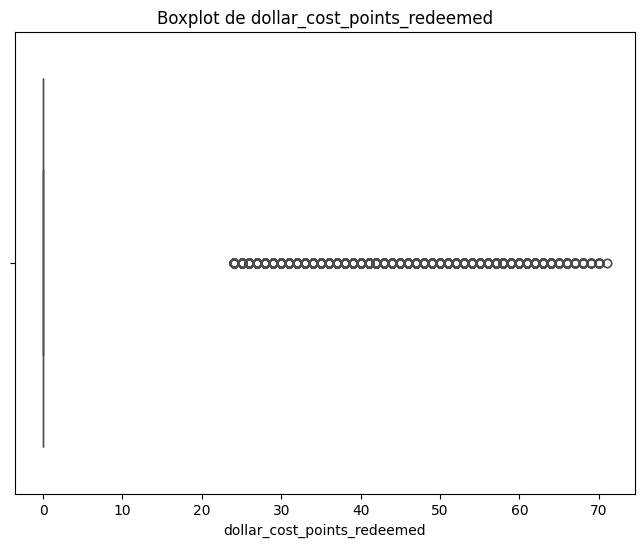

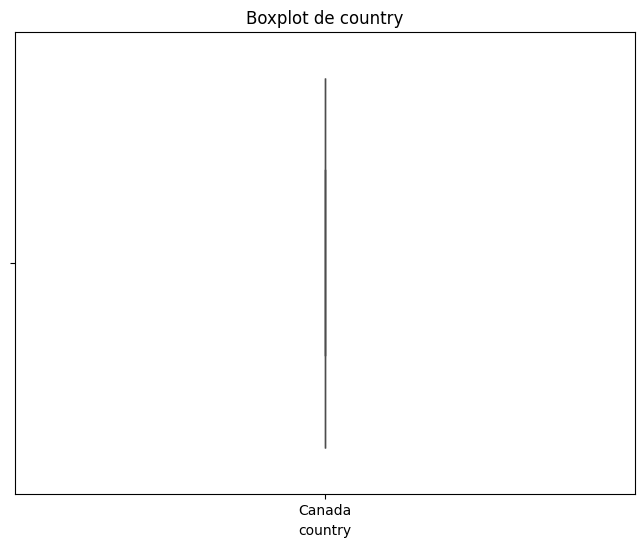

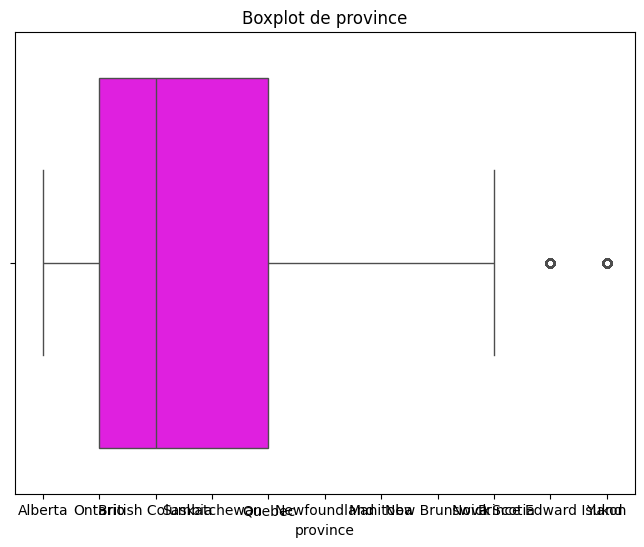

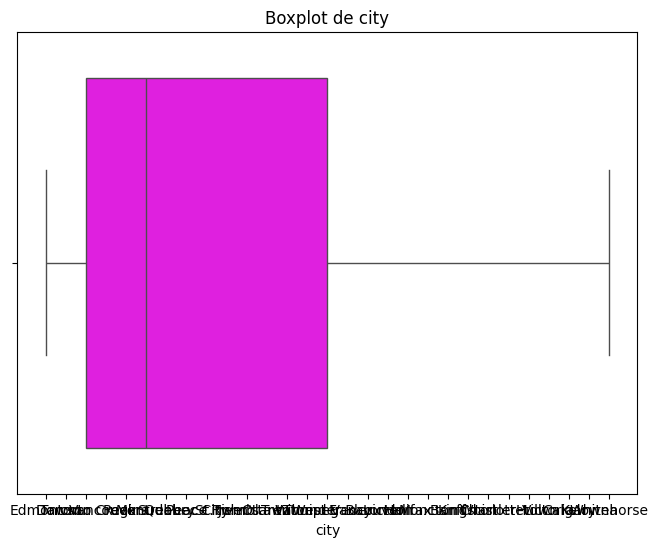

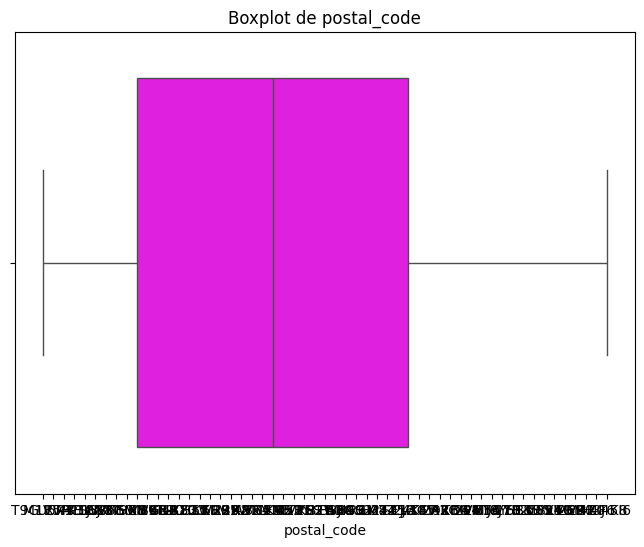

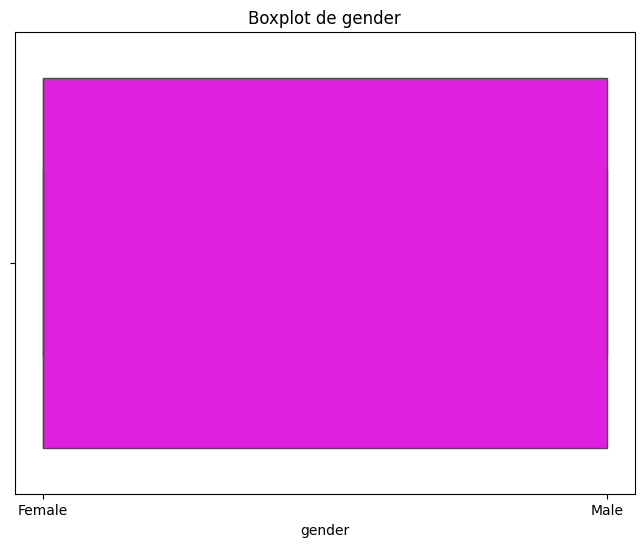

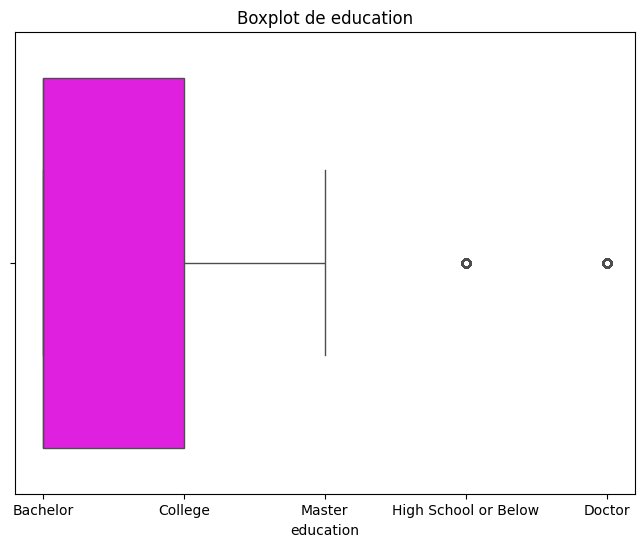

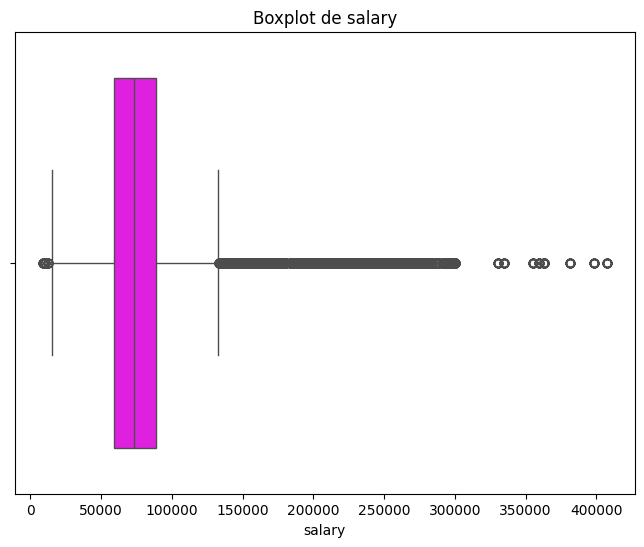

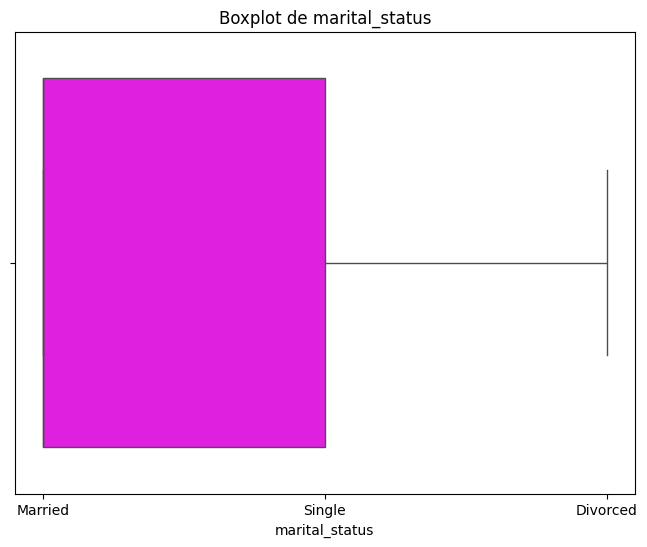

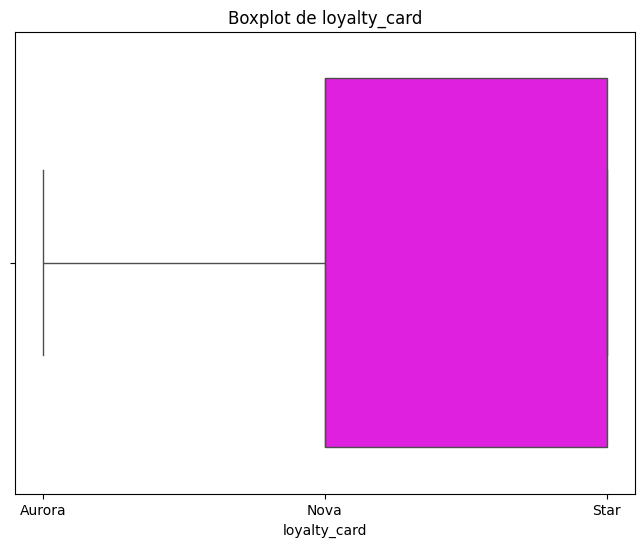

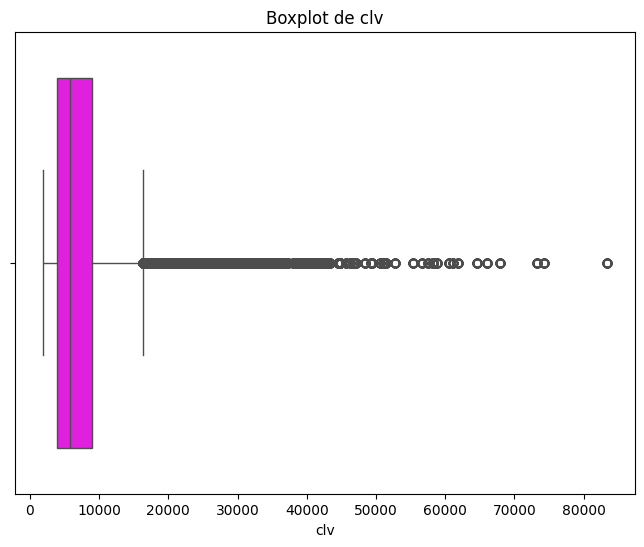

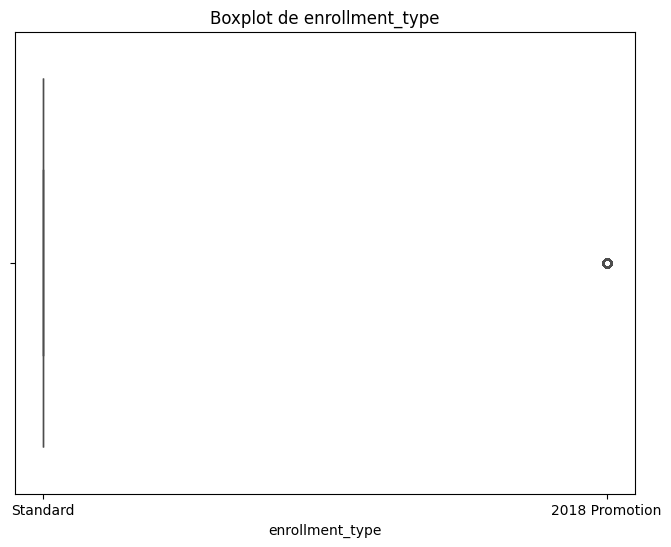

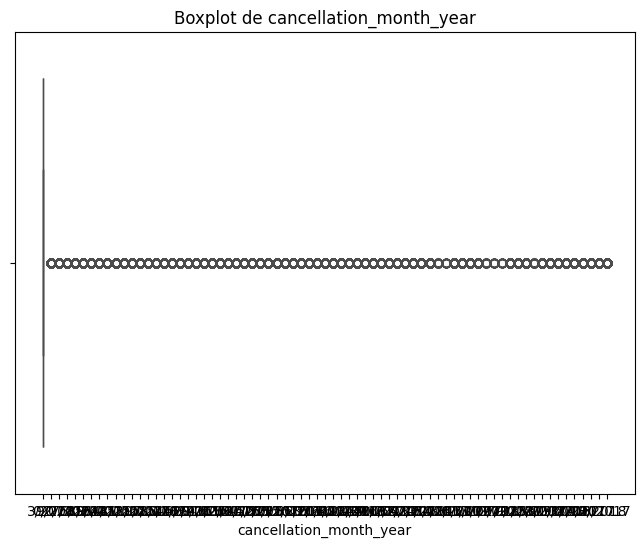

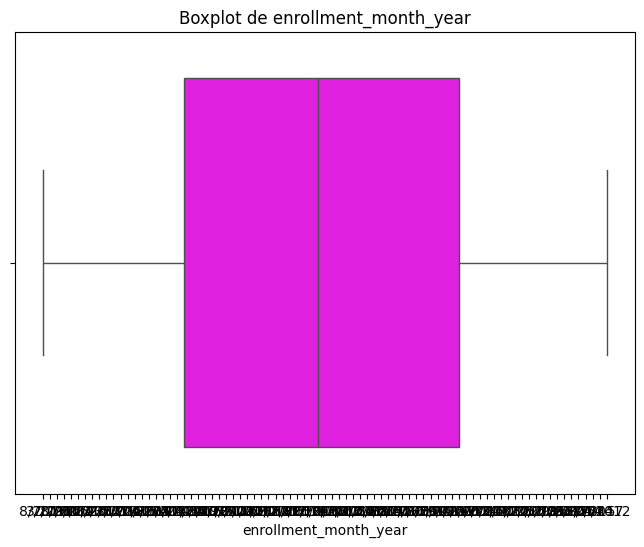

In [102]:
# Gráfico de la distribución en gráficos

for column2 in df_union:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df_union[column2], color= 'magenta'),
    boxprops=dict(color= 'blue'),     # Cambiar el color del borde de la caja
    medianprops=dict(color= 'green'), # Cambiar el color de la mediana
    whiskerprops=dict(color= 'blue'),  # Cambiar el color de las líneas de los bigotes
    capprops=dict(color= 'white'),      # Cambiar el color de las líneas en los extremos de los bigotes)
    plt.title(f'Boxplot de {column2}')
    plt.xlabel(column2)
    plt.show()

In [90]:
df_union.head()

,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,cancellation_month_year,enrollment_month_year
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,0/0,8/2016
1,100102,2017,1,10,4,14,2030,203.0,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,College,NaN,Single,Nova,2887.74,Standard,0/0,3/2013
2,100140,2017,1,6,0,6,1200,120.0,0,0,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,College,NaN,Divorced,Nova,2838.07,Standard,0/0,7/2016
3,100214,2017,1,0,0,0,0,0.0,0,0,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,63253.0,Married,Star,4170.57,Standard,0/0,8/2015
4,100272,2017,1,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,P1L 8X8,Female,Bachelor,91163.0,Divorced,Star,6622.05,Standard,0/0,1/2014


In [91]:
df_union.describe

<bound method NDFrame.describe of         loyalty_number  year  month  flights_booked  flights_with_companions  \
0               100018  2017      1               3                        0   
1               100102  2017      1              10                        4   
2               100140  2017      1               6                        0   
3               100214  2017      1               0                        0   
4               100272  2017      1               0                        0   
...                ...   ...    ...             ...                      ...   
403755          999902  2018     12               0                        0   
403756          999911  2018     12               0                        0   
403757          999940  2018     12               3                        0   
403758          999982  2018     12               0                        0   
403759          999986  2018     12               0                        0   

     

In [104]:
# Hago una correlación entre las variables del Data Frame

from itertools import combinations

# Defino la lista los nombres de las variables numéricas 
numbers = df_union.select_dtypes(include = np.number).columns

# Uso el metodo 'combinations' para generar el máximo número de combinaciones posibles entre todas las columnas
combinations_1 = list(combinations(numbers, 2))

combinations_1


[('loyalty_number', 'year'),
 ('loyalty_number', 'month'),
 ('loyalty_number', 'flights_booked'),
 ('loyalty_number', 'flights_with_companions'),
 ('loyalty_number', 'total_flights'),
 ('loyalty_number', 'distance'),
 ('loyalty_number', 'points_accumulated'),
 ('loyalty_number', 'points_redeemed'),
 ('loyalty_number', 'dollar_cost_points_redeemed'),
 ('loyalty_number', 'salary'),
 ('loyalty_number', 'clv'),
 ('year', 'month'),
 ('year', 'flights_booked'),
 ('year', 'flights_with_companions'),
 ('year', 'total_flights'),
 ('year', 'distance'),
 ('year', 'points_accumulated'),
 ('year', 'points_redeemed'),
 ('year', 'dollar_cost_points_redeemed'),
 ('year', 'salary'),
 ('year', 'clv'),
 ('month', 'flights_booked'),
 ('month', 'flights_with_companions'),
 ('month', 'total_flights'),
 ('month', 'distance'),
 ('month', 'points_accumulated'),
 ('month', 'points_redeemed'),
 ('month', 'dollar_cost_points_redeemed'),
 ('month', 'salary'),
 ('month', 'clv'),
 ('flights_booked', 'flights_with_co

In [106]:
# Creo una función para identificar si las relaciones entre las variables son lienales o no
def ident_lineal (df_union, list_combination_columns):

    rel_lineal = []
    rel_no_lineal = []

    for tupla in list_combination_columns: 
        # Realizar la prueba de normalidad
        _, p_value1 = kstest(df_union[tupla[0]], "norm")
        _, p_value2 = kstest(df_union[tupla[1]], "norm")

        if p_value1 > 0.05 and p_value2 > 0.05:
            rel_lineal.append(tupla)
        else:
            rel_no_lineal.append(tupla)

    return rel_lineal, rel_no_lineal

lineal, no_lineal = ident_lineal(df_union, combinations_1)

print(f"Las variables a las que tengamos que aplicar la correlacion de pearson son: {lineal}")
print(f"Las variables a las que tengamos que aplicar la correlacion de spearman son: {no_lineal}")

Las variables a las que tengamos que aplicar la correlacion de pearson son: []
Las variables a las que tengamos que aplicar la correlacion de spearman son: [('loyalty_number', 'year'), ('loyalty_number', 'month'), ('loyalty_number', 'flights_booked'), ('loyalty_number', 'flights_with_companions'), ('loyalty_number', 'total_flights'), ('loyalty_number', 'distance'), ('loyalty_number', 'points_accumulated'), ('loyalty_number', 'points_redeemed'), ('loyalty_number', 'dollar_cost_points_redeemed'), ('loyalty_number', 'salary'), ('loyalty_number', 'clv'), ('year', 'month'), ('year', 'flights_booked'), ('year', 'flights_with_companions'), ('year', 'total_flights'), ('year', 'distance'), ('year', 'points_accumulated'), ('year', 'points_redeemed'), ('year', 'dollar_cost_points_redeemed'), ('year', 'salary'), ('year', 'clv'), ('month', 'flights_booked'), ('month', 'flights_with_companions'), ('month', 'total_flights'), ('month', 'distance'), ('month', 'points_accumulated'), ('month', 'points_re

In [107]:
# Filtro solo las columnas numéricas del DataFrame
df_numeric = df_union.select_dtypes(include=[np.number])

# Calculo la matriz de correlación de Spearman
df_corr = df_numeric.corr(method="spearman")

print(df_corr)


                             loyalty_number      year     month  \
loyalty_number                     1.000000  0.000391  0.000199   
year                               0.000391  1.000000 -0.000025   
month                              0.000199 -0.000025  1.000000   
flights_booked                    -0.002372  0.059747  0.068795   
flights_with_companions           -0.002083  0.031023  0.048815   
total_flights                     -0.002619  0.058045  0.071942   
distance                          -0.002112  0.064459  0.067238   
points_accumulated                -0.002049  0.076670  0.053263   
points_redeemed                    0.000209  0.018140  0.012119   
dollar_cost_points_redeemed        0.000208  0.018137  0.012119   
salary                             0.002996  0.000132  0.000034   
clv                               -0.007333  0.000201  0.000045   

                             flights_booked  flights_with_companions  \
loyalty_number                    -0.002372             

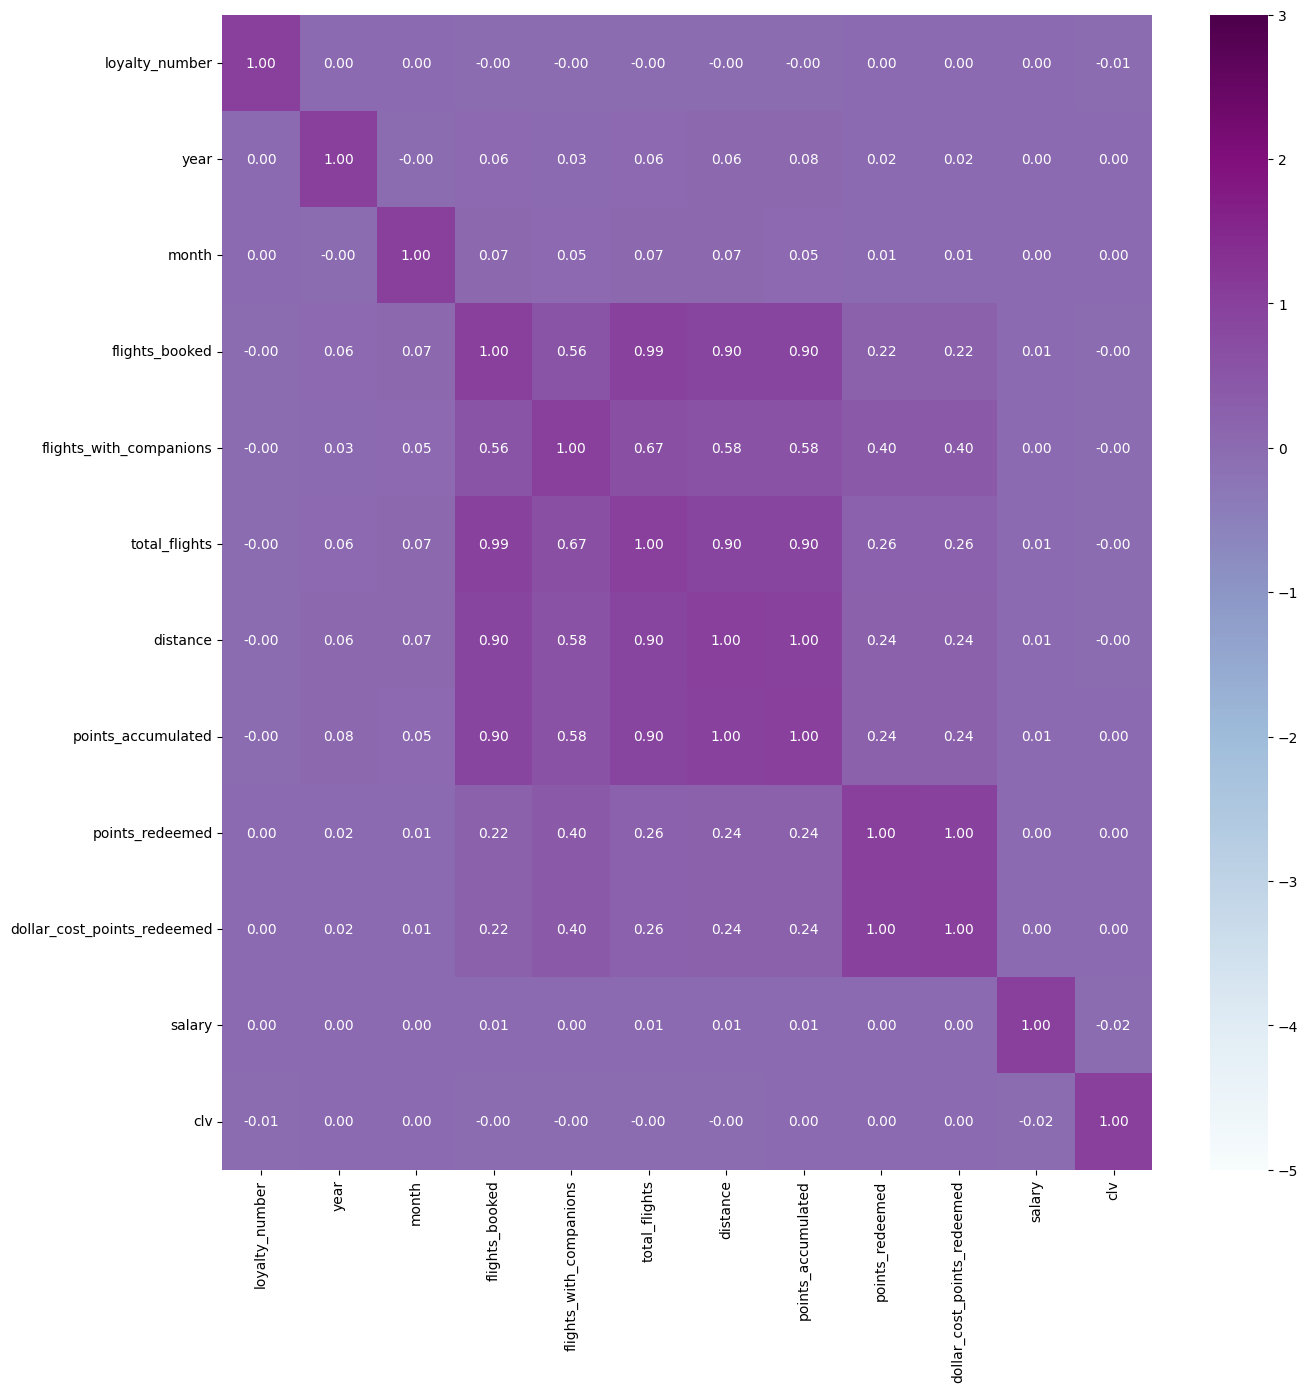

In [108]:
# Gráfico de de correlación de variables
plt.figure(figsize = (15, 15))
sns.heatmap(df_corr,
            annot = True, # para que nos muestre los valores de cada una de las celdas del heatmap
            fmt = ".2f",  # para que nos redondee a dos decimales
            cmap = "BuPu", # para establecer el color de la gráfica
            vmax = 3, # para indicar cual es el valor máximo de nuestra escala de colores
            vmin = -5); # para identificar el valor mínimo de nuestra escala de colores

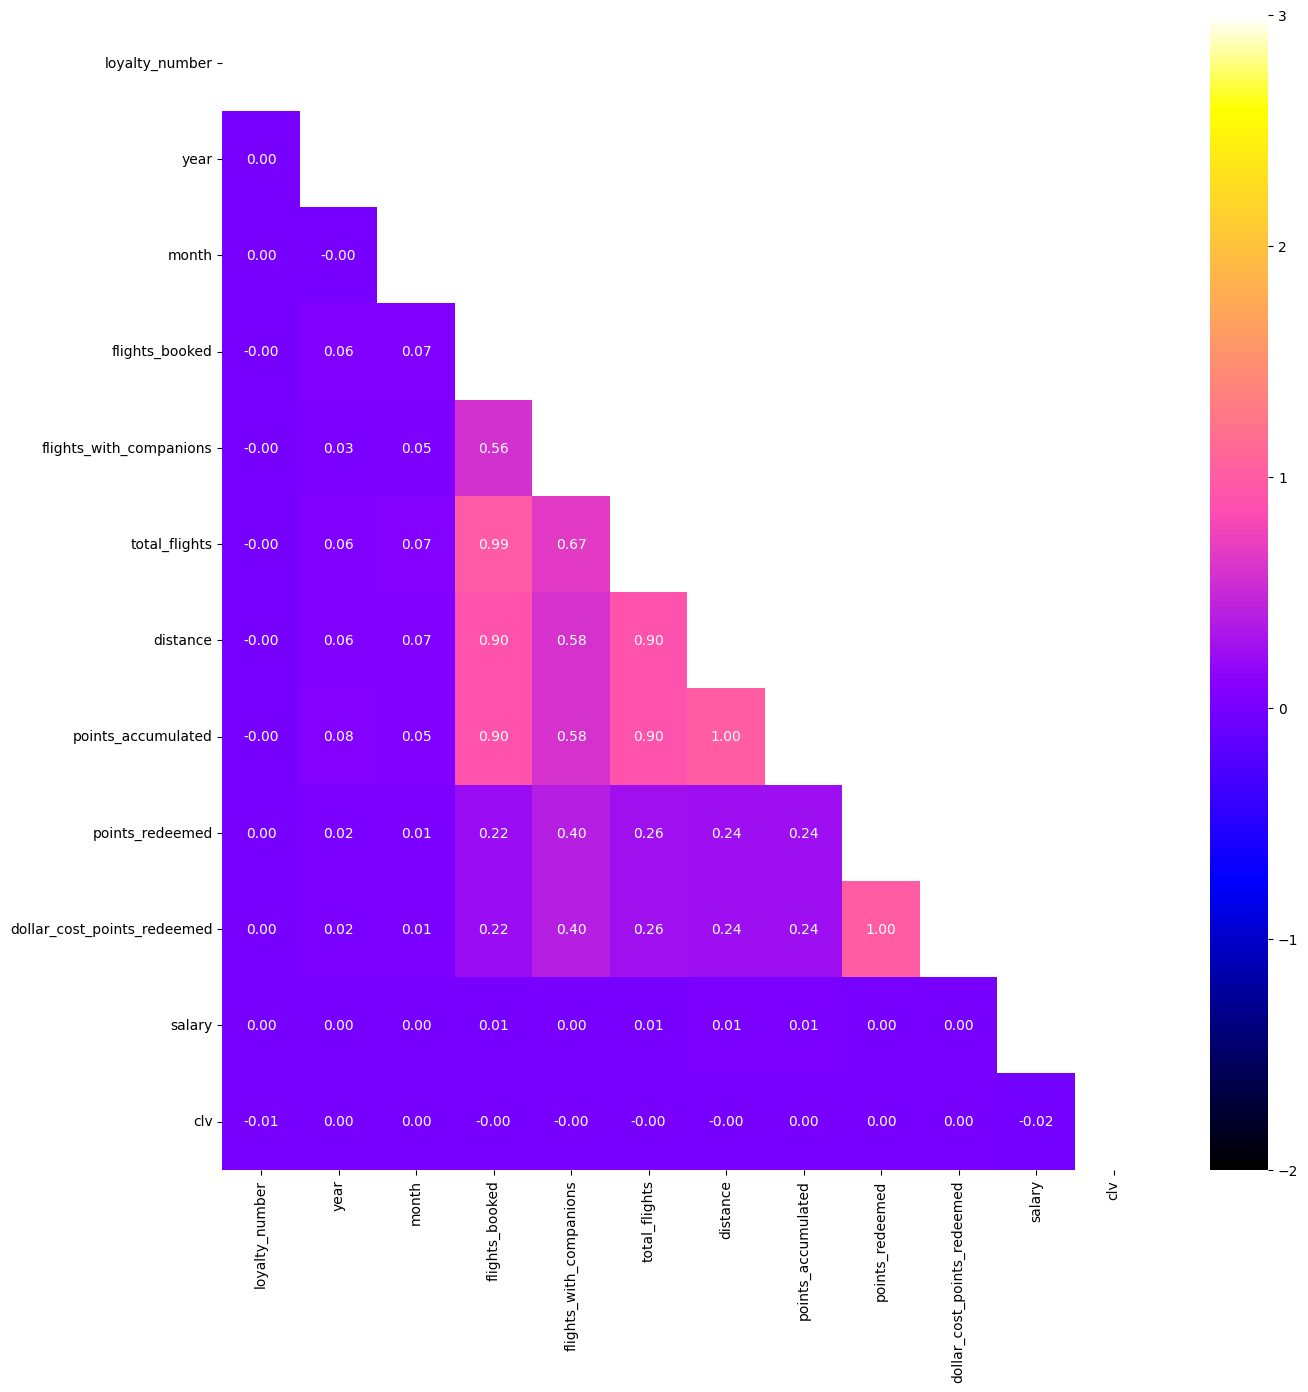

In [109]:
# Creo otro gráfcio para entender de forma más sencilla la matriz de correlación

# creo una máscara
mask = np.triu(np.ones_like(df_corr, dtype=bool))

plt.figure(figsize = (15, 15))
sns.heatmap(df_corr, 
            annot = True, 
            fmt = ".2f", 
            cmap = "gnuplot2", 
            vmax = 3, 
            vmin = -2, 
            mask = mask); 

In [99]:
# guardo el df final

df_union.to_csv('df_union.csv', index= False)

In [98]:
df_union.head()

,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,cancellation_month_year,enrollment_month_year
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,0/0,8/2016
1,100102,2017,1,10,4,14,2030,203.0,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,College,NaN,Single,Nova,2887.74,Standard,0/0,3/2013
2,100140,2017,1,6,0,6,1200,120.0,0,0,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,College,NaN,Divorced,Nova,2838.07,Standard,0/0,7/2016
3,100214,2017,1,0,0,0,0,0.0,0,0,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,63253.0,Married,Star,4170.57,Standard,0/0,8/2015
4,100272,2017,1,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,P1L 8X8,Female,Bachelor,91163.0,Divorced,Star,6622.05,Standard,0/0,1/2014
